In [1]:
import pandas as pd
import numpy as np
import  math
from math import sqrt
import statistics
import matplotlib.pyplot as plt
from statistics import mean
from statistics import median
from statistics import mode
from statistics import harmonic_mean
from scipy.stats import skew
from scipy.stats import kurtosis
# from sympy import fft

import entropy as ent
import collections
import scipy
# import tensorflow as tf
from scipy.interpolate import interp1d




# import sklearn.pca

In [2]:

# df = pd.read_csv(r"C:\new\BTP\BTP data\Rash and Aggressive Driving\My Experiment 2022-10-13 19-57-37\Accelerometer.csv")
df = pd.read_csv(r"C:\new\BTP\BTP data\Rash and Aggressive Driving\My Experiment 2022-10-13 20-11-37\Accelerometer.csv")
# time = df.iloc[:451300,0].values #439500
# acc_x =df.iloc[:451300,1].values 
# acc_y =df.iloc[:451300,2].values
# acc_z =df.iloc[:451300,3].values

acc_x =df.iloc[:,1].values
time = df.iloc[:,0].values  #250*878
acc_y =df.iloc[:,2].values
acc_z =df.iloc[:,3].values


In [3]:
acc_x.size

240003

In [4]:
240000/250


960.0

In [5]:
867*250

216750

In [6]:
df

,Time (s),Acceleration x (m/s^2),Acceleration y (m/s^2),Acceleration z (m/s^2)
0,0.005349,0.213084,-0.830788,9.591172
1,0.007302,0.215478,-0.840365,9.615114
2,0.009317,0.237026,-0.857124,9.636662
3,0.011331,0.241814,-0.845153,9.655815
4,0.013345,0.234632,-0.840365,9.660604
...,...,...,...,...
239998,480.586080,-0.359130,5.707777,10.014946
239999,480.588080,-0.373495,5.705383,9.916783
240000,480.590080,-0.383072,5.710171,9.799467
240001,480.592080,-0.407014,5.710171,9.665392


In [7]:
# Vx = np.mean(acc_x)
# Vy = np.mean(acc_y)
# Vz = np.mean(acc_z)
# v = (Vx,Vy,Vz)

# dx= (acc_x - Vx)
# dy= (acc_y - Vy)
# dz= (acc_z - Vz)
# d = (dx,dy,dz)

# px_tem= (((dx*Vx + dy*Vy + dz*Vz)/(Vx*Vx + Vy*Vy + Vz*Vz)))
# py_tem= (((dx*Vx + dy*Vy + dz*Vz)/(Vx*Vx + Vy*Vy + Vz*Vz)))
# pz_tem= (((dx*Vx + dy*Vy + dz*Vz)/(Vx*Vx + Vy*Vy + Vz*Vz)))
# p_add = px_tem + py_tem + pz_tem

# pvx = p_add*Vx
# pvy = p_add*Vy
# pvz = p_add*Vz
# pv = (pvx,pvy,pvz)#vertical component with 3 array

# phx = dx-pvx
# phy = dy-pvy
# phz = dz-pvz
# ph = (phx,phy,phz) #horizonal component with 3 array

# # Pvm is magnitute of vertical three array
# # phm is magnitute of horizonal three array
# from math import sqrt
# phm = np.sqrt( phx*phx + phy*phy + phz*phz )
# pvm = np.sqrt( pvx*pvx + pvy*pvy + pvz*pvz )

# df["vertical"] = pvm
# df ["horizontal"] =phm


In [8]:
# df["vertical"] = pvm
# df ["horizontal"] =phm

In [9]:
df2 = pd.read_csv(r"C:\new\BTP\accelerometer\new_empty.csv")
df2

,mean_x\tmean_y\tmean_z


In [10]:
df_value = pd.DataFrame()
df_value

""


## Horizontal and vertical comp. 

In [11]:
# plt.plot(time,pvm)
# plt.plot(time,phm)
# plt.legend(["vertical", " horizontal"])

In [12]:
import numpy as np
VerticalComponentList=[]
HorizontalComponentList = []


def GetHorizontalAndVerticalComponent(AcclRecordInListX, AcclRecordInListY, AcclRecordInListZ):
    Gravity = [np.mean(AcclRecordInListX),np.mean(AcclRecordInListY),np.mean(AcclRecordInListZ)]
    for indexj in range(len(AcclRecordInListX)):
        Accl = [AcclRecordInListX[indexj],AcclRecordInListY[indexj],AcclRecordInListZ[indexj]]
        VerticalComponent = np.dot(Accl,Gravity)
        VerticalComponentInGravityDirection = [VerticalComponent * G for G in Gravity]
        HorizontalComponentVector = [Accl[i]-VerticalComponentInGravityDirection[i] for i in range(3)]
        HorizontalComponent = np.linalg.norm(HorizontalComponentVector)
        VerticalComponentList.append(VerticalComponent)
        HorizontalComponentList.append(HorizontalComponent)
    return(HorizontalComponentList,VerticalComponentList)


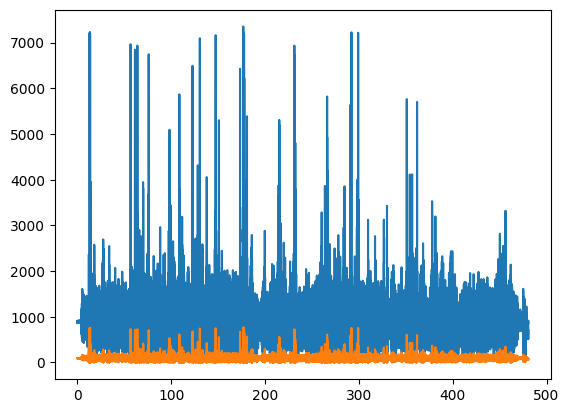

In [13]:
hvfxn = GetHorizontalAndVerticalComponent(acc_x,acc_y,acc_z)
df_value["vertical"] = np.abs(hvfxn[1])
df_value["horizontal"] =np.abs(hvfxn[0])



hfxn = np.abs(hvfxn[0])
vfxn =np.abs(hvfxn[1])
plt.plot(time,hfxn)
plt.plot(time,vfxn)

##time averge

In [14]:
df_value

,vertical,horizontal
0,92.590458,883.545646
1,92.823088,885.765524
2,93.028437,887.725092
3,93.208099,889.439518
4,93.255232,889.889274
...,...,...
239998,95.025459,906.801161
239999,94.084838,897.825444
240000,92.956072,887.054429
240001,91.671813,874.799642


In [15]:
df_value

,vertical,horizontal
0,92.590458,883.545646
1,92.823088,885.765524
2,93.028437,887.725092
3,93.208099,889.439518
4,93.255232,889.889274
...,...,...
239998,95.025459,906.801161
239999,94.084838,897.825444
240000,92.956072,887.054429
240001,91.671813,874.799642


In [16]:
#mean window

tem1 = df_value.iloc[:,1].values

j=0
leng =int(len(tem1)/250-1)
mean_y=mean_x=np.empty(leng,dtype=float)
p=0
for i in range(500,len(tem1),250):
    x = df_value.iloc[j:i,0].values
    y = df_value.iloc[j:i,1].values
#     z = df.iloc[j:i,3].values
    mean_x[p] = mean(x)
    mean_y[p] = mean(y)
#     mean_z[p] = mean(z)
 
    p=p+1
    j=i-250


    
#labeling data save
df2["mean_x"] = mean_x
df2["mean_y"] = mean_y
# df2["mean_z"] = mean_z

    
print("used array length",p)
print("total array length", leng)



used array length 959
total array length 959


In [17]:
df2

,mean_x\tmean_y\tmean_z,mean_x,mean_y
0,NaN,888.574276,888.574276
1,NaN,888.939783,888.939783
2,NaN,889.435589,889.435589
3,NaN,889.436641,889.436641
4,NaN,889.121660,889.121660
...,...,...,...
954,NaN,732.438569,732.438569
955,NaN,808.077533,808.077533
956,NaN,811.220035,811.220035
957,NaN,756.566956,756.566956


## mean_abs

In [18]:
#mean_abs

tem1 = df_value.iloc[:,0].values

j=0
leng =int(len(tem1)/250-1)
meanab_y=meanab_x=np.empty(leng,dtype=float)
p=0
for i in range(500,len(tem1),250):
    x = df_value.iloc[j:i,0].values
    y = df_value.iloc[j:i,1].values
    meanab_x[p] = mean(abs(x))
    meanab_y[p] = mean(abs(y))
    p=p+1
    j=i-250
df2["mean_abs_x"] = meanab_x
df2["mean_abs_y"] = meanab_y



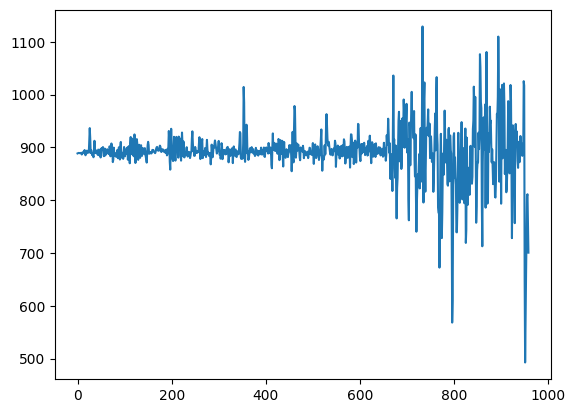

In [19]:
plt.plot(meanab_y)

In [20]:
df2

,mean_x\tmean_y\tmean_z,mean_x,mean_y,mean_abs_x,mean_abs_y
0,NaN,888.574276,888.574276,888.574276,888.574276
1,NaN,888.939783,888.939783,888.939783,888.939783
2,NaN,889.435589,889.435589,889.435589,889.435589
3,NaN,889.436641,889.436641,889.436641,889.436641
4,NaN,889.121660,889.121660,889.121660,889.121660
...,...,...,...,...,...
954,NaN,732.438569,732.438569,732.438569,732.438569
955,NaN,808.077533,808.077533,808.077533,808.077533
956,NaN,811.220035,811.220035,811.220035,811.220035
957,NaN,756.566956,756.566956,756.566956,756.566956


## medain

In [21]:

tem1 = df_value.iloc[:,0].values

j=0
leng =int(len(tem1)/250-1)
medi_z =medi_y=medi_x=np.empty(leng,dtype=float)
p=0
for i in range(500,len(tem1),250):
    x = df_value.iloc[j:i,0].values
    y = df_value.iloc[j:i,1].values
    medi_x[p] = abs(median(x)) 
    medi_y[p] = abs(median(y))
    p=p+1
    j=i-250
df2["median_x"] = medi_x
df2["median_y"] = medi_y


## mode

In [22]:

tem1 = df_value.iloc[:,0].values

j=0
leng =int(len(tem1)/250-1)
mode_z =mode_y=mode_x=np.empty(leng,dtype=float)
p=0
for i in range(500,len(tem1),250):
    x = df_value.iloc[j:i,0].values
    y = df_value.iloc[j:i,1].values
    mode_x[p] = abs(mode(x)) 
    mode_y[p] = abs(mode(y))
    p=p+1
    j=i-250
df2["mode_x"] = mode_x
df2["mode_y"] = mode_y


## variance

In [23]:
#variance
tem1 = df_value.iloc[:,0].values
j=0
leng =int(len(tem1)/250-1)
var_z =var_y=var_x=np.empty(leng,dtype=float)
p=0
for i in range(500,len(tem1),250):
    x = df_value.iloc[j:i,0].values
    y = df_value.iloc[j:i,1].values
    var_x[p] = abs(statistics.variance(x)) 
    var_y[p] = abs(statistics.variance(y))
    p=p+1
    j=i-250
df2["variance_x"] = var_x
df2["variance_y"] = var_y
lab_pra=var_x
Lab_pra =var_y

1557887.2825606994

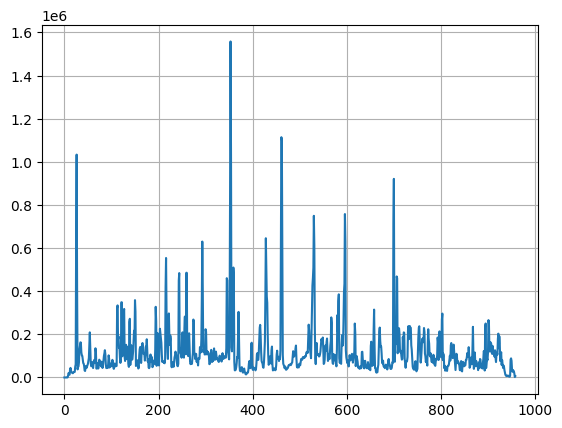

In [24]:
plt.plot(lab_pra)
plt.grid()
max(Lab_pra)

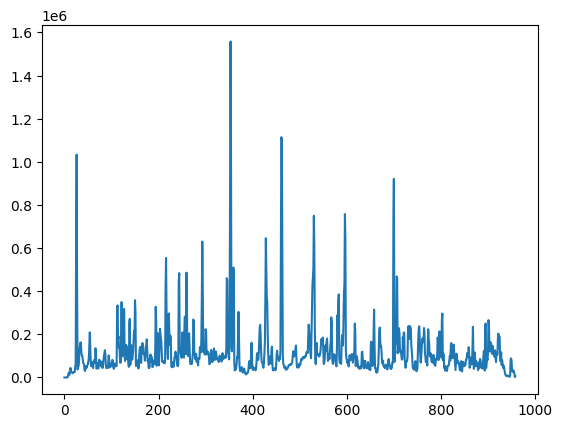

In [25]:
d= df2["variance_x"]
plt.plot(d)

<function matplotlib.pyplot.show(close=None, block=None)>

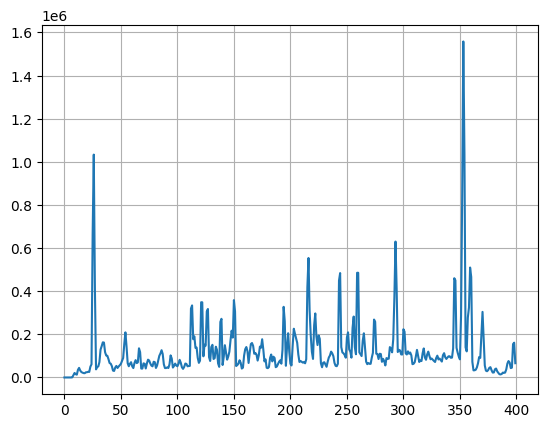

In [26]:
plt.plot(var_x[0:400])
plt.grid()
plt.show

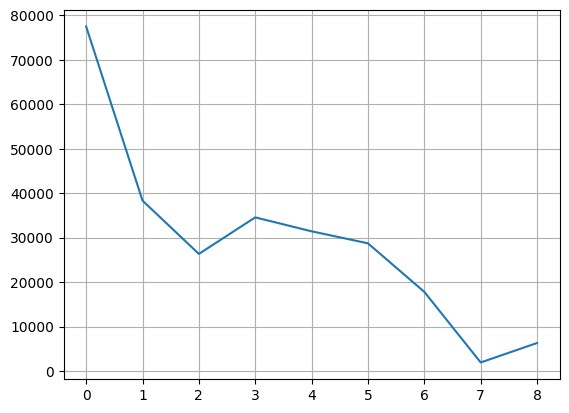

In [27]:
xy= (var_x[950:11750])
plt.grid()

plt.plot(xy)

In [28]:
##standard_deviation
tem1 = df_value.iloc[:,0].values
j=0
leng =int(len(tem1)/250-1)
sdev_z =sdev_y=sdev_x=np.empty(leng,dtype=float)
p=0
for i in range(500,len(tem1),250):
    x = df_value.iloc[j:i,0].values
    y = df_value.iloc[j:i,1].values
    sdev_x[p] = abs(statistics.stdev(x)) 
    sdev_y[p] = abs(statistics.stdev(y))
    p=p+1
    j=i-250
df2["stdev_x"] = sdev_x
df2["stdev_y"] = sdev_y

<function matplotlib.pyplot.show(close=None, block=None)>

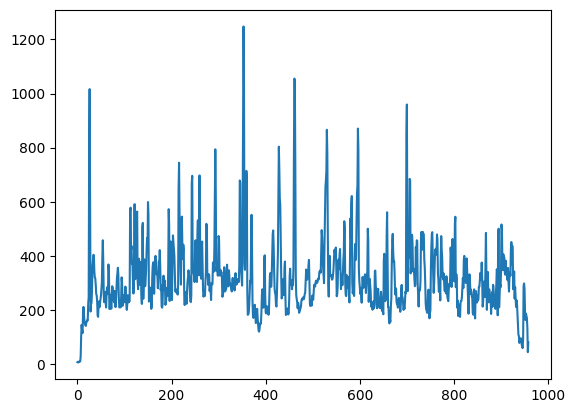

In [29]:
plt.grid
plt.plot(sdev_x)
plt.show

In [30]:
# #geometric_mean
# tem1 = df.iloc[:,2].values
# j=0
# leng =int(len(tem1)/250-1)
# gm_z =gm_y=gm_x=np.empty(leng,dtype=float)
# p=0
# for i in range(500,len(tem1),250):
#     x = df.iloc[j:i,2].values
#     y = df.iloc[j:i,3].values
#     z = df.iloc[j:i,4].values
#     gm_x[p] = abs(statistics.geometric_mean(x)) 
#     gm_y[p] = abs(statistics.geometric_mean(y))
#     gm_z[p] = abs(statistics.geometric_mean(z))
#     p=p+1
#     j=i-250

# df2["stdev_x"] = var_x
# df2["stdev_y"] = var_y
# df2["stdev_z"] = var_z

In [31]:
#harmonic_mean
tem1 = df_value.iloc[:,0].values
j=0
leng =int(len(tem1)/250-1)
hm_z =hm_y=hm_x=np.empty(leng,dtype=float)
p=0
for i in range(500,len(tem1),250):
    x = df_value.iloc[j:i,0].values
    y = df_value.iloc[j:i,1].values
    
    hm_x[p] = harmonic_mean(abs(x)) 
    hm_y[p] = harmonic_mean(abs(y))
   
    p=p+1
    j=i-250

df2["harmonic_mean_x"] =hm_x
df2["harmonic_mean_y"] = hm_y


c:\Users\rames\AppData\Local\Programs\Python\Python310\lib\statistics.py:428: RuntimeWarning: divide by zero encountered in double_scalars
  T, total, count = _sum(w / x if w else 0 for w, x in zip(weights, data))


In [32]:
df2

,mean_x\tmean_y\tmean_z,mean_x,mean_y,mean_abs_x,mean_abs_y,median_x,median_y,mode_x,mode_y,variance_x,variance_y,stdev_x,stdev_y,harmonic_mean_x,harmonic_mean_y
0,NaN,888.574276,888.574276,888.574276,888.574276,888.426128,888.426128,889.258492,889.258492,46.978548,46.978548,6.854090,6.854090,888.521387,888.521387
1,NaN,888.939783,888.939783,888.939783,888.939783,888.580444,888.580444,888.084327,888.084327,29.080877,29.080877,5.392669,5.392669,888.907309,888.907309
2,NaN,889.435589,889.435589,889.435589,889.435589,888.884697,888.884697,886.158900,886.158900,34.417220,34.417220,5.866619,5.866619,889.397111,889.397111
3,NaN,889.436641,889.436641,889.436641,889.436641,889.048364,889.048364,879.421299,879.421299,38.174841,38.174841,6.178579,6.178579,889.393842,889.393842
4,NaN,889.121660,889.121660,889.121660,889.121660,889.369238,889.369238,879.421299,879.421299,86.932866,86.932866,9.323780,9.323780,889.023984,889.023984
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
954,NaN,732.438569,732.438569,732.438569,732.438569,758.496084,758.496084,956.460772,956.460772,31418.202819,31418.202819,177.251806,177.251806,650.398262,650.398262
955,NaN,808.077533,808.077533,808.077533,808.077533,777.191929,777.191929,956.460772,956.460772,28713.587381,28713.587381,169.450841,169.450841,772.563578,772.563578
956,NaN,811.220035,811.220035,811.220035,811.220035,782.051180,782.051180,739.807834,739.807834,17791.535057,17791.535057,133.384913,133.384913,791.166804,791.166804
957,NaN,756.566956,756.566956,756.566956,756.566956,763.101744,763.101744,739.807834,739.807834,1906.734229,1906.734229,43.666168,43.666168,753.928542,753.928542


##  Mean-crossing rate

In [33]:
def getZeroCrossingRate(arr):
    my_array = np.array(arr)
    return float("{0:.2f}".format((((my_array[:-1] * my_array[1:]) < 0).sum())/len(arr)))
def getMeanCrossingRate(arr):
    return getZeroCrossingRate(np.array(arr) - np.mean(arr))

In [34]:
tem1 = df_value.iloc[:,0].values
j=0
leng =int(len(tem1)/250-1)
gmcr_z =gmcr_y=gmcr_x=np.empty(leng,dtype=float)
p=0
for i in range(500,len(tem1),250):
    x = df_value.iloc[j:i,0].values
    y = df_value.iloc[j:i,1].values    
    
    
    gmcr_x[p] = getMeanCrossingRate(x)
    gmcr_y[p] = getMeanCrossingRate(y)
    p=p+1
    j=i-250

df2["Mean-crossing rate_x"] =gmcr_x
df2["Mean-crossing rate_y"] = gmcr_y


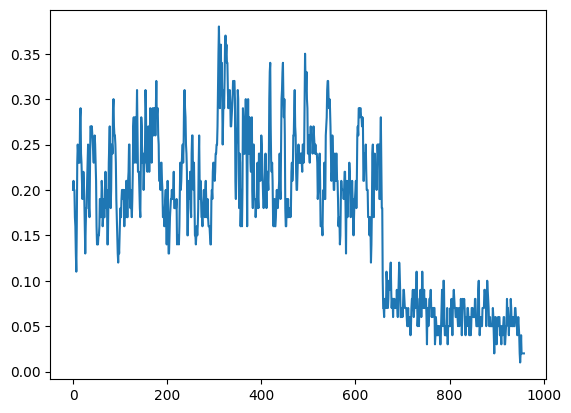

In [35]:
plt.plot(gmcr_x)

## Third quartile

In [36]:
tem1 = df_value.iloc[:,0].values
j=0
leng =int(len(tem1)/250-1)
third_qua_z =third_qua_y=third_qua_x=np.empty(leng,dtype=float)
p=0
for i in range(500,len(tem1),250):
    x = df_value.iloc[j:i,0].values
    y = df_value.iloc[j:i,1].values
    
    
    third_qua_x[p] = np.percentile(x, 75) 
    third_qua_y[p] = np.percentile(y, 75)
    p=p+1
    j=i-250

df2["third_quartile_x"] = third_qua_x
df2["third_quartile_y"] = third_qua_y


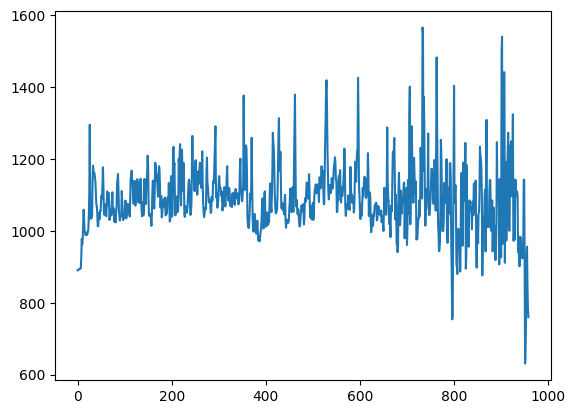

In [37]:
plt.plot(third_qua_x)

## RMS

In [38]:
def rmsValue(arr, n):
    square = 0
    mean = 0.0
    root = 0.0
    for i in range(0,n):
        square += (arr[i]**2)
    mean = (square / (float)(n))
    root = math.sqrt(mean)
     
    return root

In [39]:
tem1 = df_value.iloc[:,0].values
j=0
leng =int(len(tem1)/250-1)
RMS_z =RMS_y=RMS_x=np.empty(leng,dtype=float)
p=0
for i in range(500,len(tem1),250):
    x = df_value.iloc[j:i,0].values
    y = df_value.iloc[j:i,1].values
    
    
    RMS_x[p] = rmsValue(x, len(x))
    RMS_y[p] = rmsValue(y, len(y))
    p=p+1
    j=i-250

df2["RMS_x"] = RMS_x
df2["RMS_y"] = RMS_y


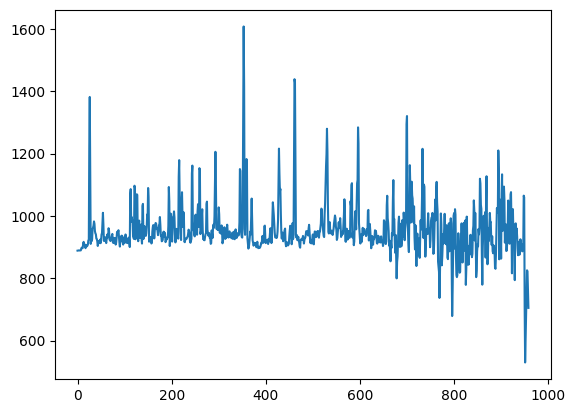

In [40]:
plt.plot(RMS_x)

## RMS_ROW error coming

In [41]:
# def rmsrow(arr1,arr2,arr3):
#     square = 0
#     mean = 0
#     root =0
#     square = (arr1**2)+(arr2**2)+(arr3**2)
#     mean = (square / (float)(n))
#     root = math.sqrt(mean)
#     return root
    

In [42]:
# tem1 = df.iloc[:,2].values
# j=0
# leng =int(len(tem1)/250-1)
# RMS_ROW =np.empty(leng,dtype=float)
# p=0
# for i in range(0,leng):
    
#     x = df.iloc[i,2].values
#     y = df.iloc[i,3].values
#     z = df.iloc[i,4].values
#     RMS_ROW[p] = rmsrow(x,y,z)
#     p+=1

# df2["RMS_ROW"] = RMS_ROW


## MAX_value

In [43]:
tem1 = df_value.iloc[:,0].values
j=0
leng =int(len(tem1)/250-1)
m_z =m_y=m_x=np.empty(leng,dtype=float)
p=0
for i in range(500,len(tem1),250):
    x = df_value.iloc[j:i,0].values
    y = df_value.iloc[j:i,1].values
    m_x[p] = max(x) 
    m_y[p] = max(y)
    p=p+1
    j=i-250

df2["MAX_x"] =m_x
df2["MAX_y"] =m_y


## MIN _value

In [44]:
tem1 = df_value.iloc[:,0].values
j=0
leng =int(len(tem1)/250-1)
m_z =m_y=m_x=np.empty(leng,dtype=float)
p=0
for i in range(500,len(tem1),250):
    x = df_value.iloc[j:i,0].values
    y = df_value.iloc[j:i,1].values
    m_x[p] = min(x) 
    m_y[p] = min(y)
    p=p+1
    j=i-250

df2["MIN_x"] =m_x
df2["MIN_y"] =m_y


In [45]:
df2.drop(df2.columns[0], axis=1, inplace=True)
df2

,mean_x,mean_y,mean_abs_x,mean_abs_y,median_x,median_y,mode_x,mode_y,variance_x,variance_y,...,Mean-crossing rate_x,Mean-crossing rate_y,third_quartile_x,third_quartile_y,RMS_x,RMS_y,MAX_x,MAX_y,MIN_x,MIN_y
0,888.574276,888.574276,888.574276,888.574276,888.426128,888.426128,889.258492,889.258492,46.978548,46.978548,...,0.20,0.20,890.684708,890.684708,888.600658,888.600658,914.556998,914.556998,859.410116,859.410116
1,888.939783,888.939783,888.939783,888.939783,888.580444,888.580444,888.084327,888.084327,29.080877,29.080877,...,0.21,0.21,890.737646,890.737646,888.956107,888.956107,917.676307,917.676307,865.530794,865.530794
2,889.435589,889.435589,889.435589,889.435589,888.884697,888.884697,886.158900,886.158900,34.417220,34.417220,...,0.20,0.20,892.385276,892.385276,889.454898,889.454898,917.676307,917.676307,865.530794,865.530794
3,889.436641,889.436641,889.436641,889.436641,889.048364,889.048364,879.421299,879.421299,38.174841,38.174841,...,0.20,0.20,893.445085,893.445085,889.458058,889.458058,916.378588,916.378588,867.260896,867.260896
4,889.121660,889.121660,889.121660,889.121660,889.369238,889.369238,879.421299,879.421299,86.932866,86.932866,...,0.17,0.17,894.882388,894.882388,889.170448,889.170448,916.378588,916.378588,861.469830,861.469830
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
954,732.438569,732.438569,732.438569,732.438569,758.496084,758.496084,956.460772,956.460772,31418.202819,31418.202819,...,0.02,0.02,921.772709,921.772709,753.539398,753.539398,1223.922497,1223.922497,70.681276,70.681276
955,808.077533,808.077533,808.077533,808.077533,777.191929,777.191929,956.460772,956.460772,28713.587381,28713.587381,...,0.02,0.02,956.460772,956.460772,825.618229,825.618229,1223.922497,1223.922497,503.561026,503.561026
956,811.220035,811.220035,811.220035,811.220035,782.051180,782.051180,739.807834,739.807834,17791.535057,17791.535057,...,0.02,0.02,845.416704,845.416704,822.091173,822.091173,1213.731839,1213.731839,594.667038,594.667038
957,756.566956,756.566956,756.566956,756.566956,763.101744,763.101744,739.807834,739.807834,1906.734229,1906.734229,...,0.02,0.02,782.051180,782.051180,757.823515,757.823515,826.001028,826.001028,594.667038,594.667038


## Entropy

In [46]:

def estimate_shannon_entropy(sequence):
    m = len(sequence)
    bases = collections.Counter([tmp_base for tmp_base in sequence])
 
    shannon_entropy_value = 0
    for base in bases:
        # number of residues
        n_i = bases[base]
        # n_i (# residues type i) / M (# residues in column)
        p_i = n_i / float(m)
        entropy_i = p_i * (math.log(p_i, 2))
        shannon_entropy_value += entropy_i
 
    return shannon_entropy_value * -1

In [47]:
tem1 = df_value.iloc[:,0].values
j=0
leng =int(len(tem1)/250-1)
m_z =m_y=m_x=np.empty(leng,dtype=float)
p=0
for i in range(500,len(tem1),250):
    x = df_value.iloc[j:i,0].values
    y = df_value.iloc[j:i,1].values
    m_x[p] = estimate_shannon_entropy(x) 
    m_y[p] = estimate_shannon_entropy(y)
    p=p+1
    j=i-250

df2["Antropy_x"] =m_x
df2["Antropy_y"] =m_y


## skewness

In [48]:
tem1 = df_value.iloc[:,0].values
j=0
leng =int(len(tem1)/250-1)
skew_z =skew_y=skew_x=np.empty(leng,dtype=float)
p=0
for i in range(500,len(tem1),250):
    x = df_value.iloc[j:i,0].values
    y = df_value.iloc[j:i,1].values
    skew_x[p] = skew(x, axis=0, bias=True)
    skew_y[p] = skew(y, axis=0, bias=True)
    p=p+1
    j=i-250

df2["skewness_x"] =skew_x
df2["skewness_y"] =skew_y


## kurtosis

In [49]:
tem1 = df_value.iloc[:,0].values
j=0
leng =int(len(tem1)/250-1)
skew_z =skew_y=skew_x=np.empty(leng,dtype=float)
p=0
for i in range(500,len(tem1),250):
    x = df_value.iloc[j:i,0].values
    y = df_value.iloc[j:i,1].values
    skew_x[p] = kurtosis(x, axis=0, bias=True)
    skew_y[p] = kurtosis(y, axis=0, bias=True)
   
    p=p+1
    j=i-250

df2["kurtosis_x"] =skew_x
df2["kurtosis_y"] =skew_y


In [50]:
df2

,mean_x,mean_y,mean_abs_x,mean_abs_y,median_x,median_y,mode_x,mode_y,variance_x,variance_y,...,MAX_x,MAX_y,MIN_x,MIN_y,Antropy_x,Antropy_y,skewness_x,skewness_y,kurtosis_x,kurtosis_y
0,888.574276,888.574276,888.574276,888.574276,888.426128,888.426128,889.258492,889.258492,46.978548,46.978548,...,914.556998,914.556998,859.410116,859.410116,8.949784,8.949784,-0.259522,-0.259522,4.480786,4.480786
1,888.939783,888.939783,888.939783,888.939783,888.580444,888.580444,888.084327,888.084327,29.080877,29.080877,...,917.676307,917.676307,865.530794,865.530794,8.965784,8.965784,0.934203,0.934203,6.869975,6.869975
2,889.435589,889.435589,889.435589,889.435589,888.884697,888.884697,886.158900,886.158900,34.417220,34.417220,...,917.676307,917.676307,865.530794,865.530794,8.965784,8.965784,0.592206,0.592206,4.075815,4.075815
3,889.436641,889.436641,889.436641,889.436641,889.048364,889.048364,879.421299,879.421299,38.174841,38.174841,...,916.378588,916.378588,867.260896,867.260896,8.961784,8.961784,0.144869,0.144869,1.726751,1.726751
4,889.121660,889.121660,889.121660,889.121660,889.369238,889.369238,879.421299,879.421299,86.932866,86.932866,...,916.378588,916.378588,861.469830,861.469830,8.961784,8.961784,-0.071770,-0.071770,0.318353,0.318353
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
954,732.438569,732.438569,732.438569,732.438569,758.496084,758.496084,956.460772,956.460772,31418.202819,31418.202819,...,1223.922497,1223.922497,70.681276,70.681276,4.907553,4.907553,-0.483483,-0.483483,0.342347,0.342347
955,808.077533,808.077533,808.077533,808.077533,777.191929,777.191929,956.460772,956.460772,28713.587381,28713.587381,...,1223.922497,1223.922497,503.561026,503.561026,4.764628,4.764628,0.204185,0.204185,-0.915304,-0.915304
956,811.220035,811.220035,811.220035,811.220035,782.051180,782.051180,739.807834,739.807834,17791.535057,17791.535057,...,1213.731839,1213.731839,594.667038,594.667038,4.813994,4.813994,0.850767,0.850767,0.504270,0.504270
957,756.566956,756.566956,756.566956,756.566956,763.101744,763.101744,739.807834,739.807834,1906.734229,1906.734229,...,826.001028,826.001028,594.667038,594.667038,4.666286,4.666286,-0.666698,-0.666698,0.782224,0.782224


In [51]:
df

,Time (s),Acceleration x (m/s^2),Acceleration y (m/s^2),Acceleration z (m/s^2)
0,0.005349,0.213084,-0.830788,9.591172
1,0.007302,0.215478,-0.840365,9.615114
2,0.009317,0.237026,-0.857124,9.636662
3,0.011331,0.241814,-0.845153,9.655815
4,0.013345,0.234632,-0.840365,9.660604
...,...,...,...,...
239998,480.586080,-0.359130,5.707777,10.014946
239999,480.588080,-0.373495,5.705383,9.916783
240000,480.590080,-0.383072,5.710171,9.799467
240001,480.592080,-0.407014,5.710171,9.665392


## First Fourier Transform (FFT) time consume

In [52]:
from scipy.fft import fft

tem1 = df_value.iloc[:,0].values
leng =int(len(tem1))
fft_y=fft_x=np.empty(leng)

x = df_value.iloc[:,0].values
y = df_value.iloc[:,1].values
fft_x = fft(x)
fft_y = fft(y)


df_value["FFT__x"] = fft_x
df_value["FFT_y"] = fft_y

In [53]:
df_value

,vertical,horizontal,FFT__x,FFT_y
0,92.590458,883.545646,2.241262e+07-0.000000e+00j,2.138742e+08-0.000000e+00j
1,92.823088,885.765524,-7.978955e+04-4.062318e+04j,-7.613888e+05-3.877021e+05j
2,93.028437,887.725092,-1.117782e+04-5.356184e+04j,-1.067634e+05-5.111438e+05j
3,93.208099,889.439518,3.670433e+04+1.181804e+04j,3.502190e+05+1.128359e+05j
4,93.255232,889.889274,1.698303e+03+8.541029e+04j,1.622585e+04+8.150064e+05j
...,...,...,...,...
239998,95.025459,906.801161,-7.953605e+04-8.133936e+04j,-7.588020e+05-7.762980e+05j
239999,94.084838,897.825444,1.698303e+03-8.541029e+04j,1.622585e+04-8.150064e+05j
240000,92.956072,887.054429,3.670433e+04-1.181804e+04j,3.502190e+05-1.128359e+05j
240001,91.671813,874.799642,-1.117782e+04+5.356184e+04j,-1.067634e+05+5.111438e+05j


## mean win _fft


In [54]:
# tem1 = df.iloc[:,2].values

# j=0
# leng =int(len(tem1)/250-1)
# mean_y=mean_x=np.empty(leng,dtype=float)
# p=0
# for i in range(500,len(tem1),250):
#     x = df.iloc[j:i,6].values
#     y = df.iloc[j:i,7].values
# #     z = df.iloc[j:i,3].values
#     mean_x[p] = mean(abs(x))
#     mean_y[p] = mean(abs(y))
# #     mean_z[p] = mean(z)
 
#     p=p+1
#     j=i-250


    
# #labeling data save
# df2["mean_x_fft"] = mean_x
# df2["mean_y_fft"] = mean_y

In [55]:
# plt.plot( meanab_x)

## mean_abs_fft

In [56]:
tem1 = df_value.iloc[:,0].values

j=0
leng =int(len(tem1)/250-1)
meanab1_y=meanab1_x=np.empty(leng,dtype=float)
p=0
for i in range(500,len(tem1),250):
    x = df_value.iloc[j:i,2].values
    y = df_value.iloc[j:i,3].values
    meanab1_x[p] = mean(abs(x))
    meanab1_y[p] = mean(abs(y))
    
    p=p+1
    j=i-250
df2["mean_abs_x_fft"] = meanab1_x
df2["mean_abs_y_fft"] = meanab1_y


## median _fft

In [57]:
tem1 = df_value.iloc[:,0].values

j=0
leng =int(len(tem1)/250-1)
medi1_z =medi1_y=medi1_x=np.empty(leng,dtype=float)
p=0
for i in range(500,len(tem1),250):
    x = df_value.iloc[j:i,2].values
    y = df_value.iloc[j:i,3].values
    medi1_x[p] = abs(median(x)) 
    medi1_y[p] = abs(median(y))
    p=p+1
    j=i-250
df2["median_x_fft"] = medi1_x
df2["median_y_fft"] = medi1_y


## mode_fft


In [58]:
tem1 = df_value.iloc[:,0].values

j=0
leng =int(len(tem1)/250-1)
mode1_z =mode1_y=mode1_x=np.empty(leng,dtype=float)
p=0
for i in range(500,len(tem1),250):
    x = df_value.iloc[j:i,2].values
    y = df_value.iloc[j:i,3].values
    mode1_x[p] = abs(mode(x)) 
    mode1_y[p] = abs(mode(y))
    p=p+1
    j=i-250
df2["mode_x_fft"] = mode1_x
df2["mode_y_fft"] = mode1_y


In [59]:
df2

,mean_x,mean_y,mean_abs_x,mean_abs_y,median_x,median_y,mode_x,mode_y,variance_x,variance_y,...,skewness_x,skewness_y,kurtosis_x,kurtosis_y,mean_abs_x_fft,mean_abs_y_fft,median_x_fft,median_y_fft,mode_x_fft,mode_y_fft
0,888.574276,888.574276,888.574276,888.574276,888.426128,888.426128,889.258492,889.258492,46.978548,46.978548,...,-0.259522,-0.259522,4.480786,4.480786,870833.636677,870833.636677,459517.955490,459517.955490,2.138742e+08,2.138742e+08
1,888.939783,888.939783,888.939783,888.939783,888.580444,888.580444,888.084327,888.084327,29.080877,29.080877,...,0.934203,0.934203,6.869975,6.869975,462234.510802,462234.510802,93844.484476,93844.484476,4.773016e+05,4.773016e+05
2,889.435589,889.435589,889.435589,889.435589,888.884697,888.884697,886.158900,886.158900,34.417220,34.417220,...,0.592206,0.592206,4.075815,4.075815,498516.650154,498516.650154,49950.171667,49950.171667,5.830684e+05,5.830684e+05
3,889.436641,889.436641,889.436641,889.436641,889.048364,889.048364,879.421299,879.421299,38.174841,38.174841,...,0.144869,0.144869,1.726751,1.726751,496439.666220,496439.666220,18107.655532,18107.655532,7.682727e+05,7.682727e+05
4,889.121660,889.121660,889.121660,889.121660,889.369238,889.369238,879.421299,879.421299,86.932866,86.932866,...,-0.071770,-0.071770,0.318353,0.318353,434687.474080,434687.474080,183776.256420,183776.256420,7.347518e+05,7.347518e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
954,732.438569,732.438569,732.438569,732.438569,758.496084,758.496084,956.460772,956.460772,31418.202819,31418.202819,...,-0.483483,-0.483483,0.342347,0.342347,433781.265699,433781.265699,183776.256420,183776.256420,2.040379e+05,2.040379e+05
955,808.077533,808.077533,808.077533,808.077533,777.191929,777.191929,956.460772,956.460772,28713.587381,28713.587381,...,0.204185,0.204185,-0.915304,-0.915304,494924.106305,494924.106305,19945.151308,19945.151308,2.852647e+04,2.852647e+04
956,811.220035,811.220035,811.220035,811.220035,782.051180,782.051180,739.807834,739.807834,17791.535057,17791.535057,...,0.850767,0.850767,0.504270,0.504270,495708.700839,495708.700839,18107.655532,18107.655532,1.687460e+05,1.687460e+05
957,756.566956,756.566956,756.566956,756.566956,763.101744,763.101744,739.807834,739.807834,1906.734229,1906.734229,...,-0.666698,-0.666698,0.782224,0.782224,461247.396775,461247.396775,427229.838757,427229.838757,3.256712e+05,3.256712e+05


In [60]:
x= df2["variance_x"]
print(x)

0         46.978548
1         29.080877
2         34.417220
3         38.174841
4         86.932866
           ...     
954    31418.202819
955    28713.587381
956    17791.535057
957     1906.734229
958     6288.513211
Name: variance_x, Length: 959, dtype: float64


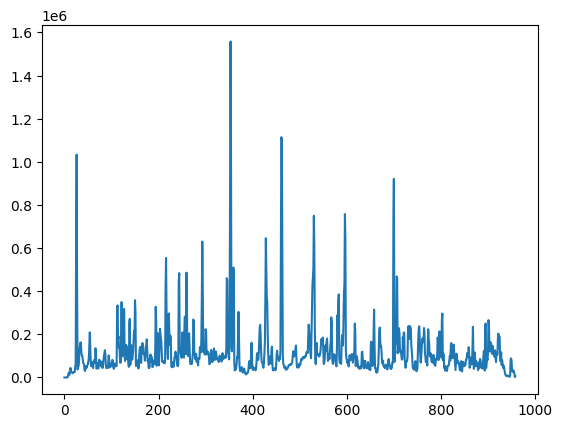

In [61]:
plt.plot(x)

## variance_fft

In [62]:

tem1 = df_value.iloc[:,0].values
j=0
leng =int(len(tem1)/250-1)
var1_z =var1_y=var1_x=np.empty(leng,dtype=float)
p=0
for i in range(500,len(tem1),250):
    x = df_value.iloc[j:i,2].values
    y = df_value.iloc[j:i,3].values
    var1_x[p] = statistics.variance(abs(x)) 
    var1_y[p] = statistics.variance(abs(y))
    p=p+1
    j=i-250
df2["variance_x_fft"] = var1_x
df2["variance_y__fft"] = var1_y

In [63]:
y= df2["variance_x_fft"]

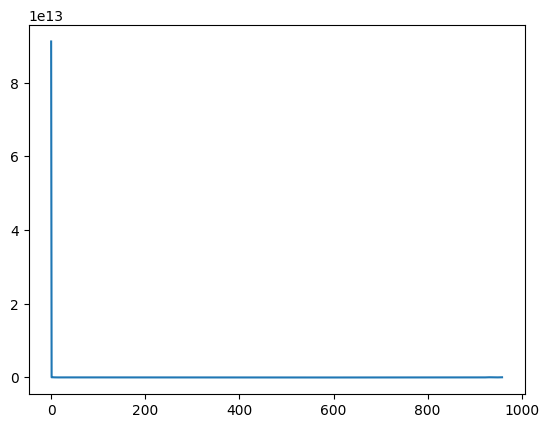

In [64]:
plt.plot(y)

In [65]:
df2

,mean_x,mean_y,mean_abs_x,mean_abs_y,median_x,median_y,mode_x,mode_y,variance_x,variance_y,...,kurtosis_x,kurtosis_y,mean_abs_x_fft,mean_abs_y_fft,median_x_fft,median_y_fft,mode_x_fft,mode_y_fft,variance_x_fft,variance_y__fft
0,888.574276,888.574276,888.574276,888.574276,888.426128,888.426128,889.258492,889.258492,46.978548,46.978548,...,4.480786,4.480786,870833.636677,870833.636677,459517.955490,459517.955490,2.138742e+08,2.138742e+08,9.115913e+13,9.115913e+13
1,888.939783,888.939783,888.939783,888.939783,888.580444,888.580444,888.084327,888.084327,29.080877,29.080877,...,6.869975,6.869975,462234.510802,462234.510802,93844.484476,93844.484476,4.773016e+05,4.773016e+05,5.104171e+10,5.104171e+10
2,889.435589,889.435589,889.435589,889.435589,888.884697,888.884697,886.158900,886.158900,34.417220,34.417220,...,4.075815,4.075815,498516.650154,498516.650154,49950.171667,49950.171667,5.830684e+05,5.830684e+05,6.176635e+10,6.176635e+10
3,889.436641,889.436641,889.436641,889.436641,889.048364,889.048364,879.421299,879.421299,38.174841,38.174841,...,1.726751,1.726751,496439.666220,496439.666220,18107.655532,18107.655532,7.682727e+05,7.682727e+05,6.560152e+10,6.560152e+10
4,889.121660,889.121660,889.121660,889.121660,889.369238,889.369238,879.421299,879.421299,86.932866,86.932866,...,0.318353,0.318353,434687.474080,434687.474080,183776.256420,183776.256420,7.347518e+05,7.347518e+05,5.720684e+10,5.720684e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
954,732.438569,732.438569,732.438569,732.438569,758.496084,758.496084,956.460772,956.460772,31418.202819,31418.202819,...,0.342347,0.342347,433781.265699,433781.265699,183776.256420,183776.256420,2.040379e+05,2.040379e+05,5.706019e+10,5.706019e+10
955,808.077533,808.077533,808.077533,808.077533,777.191929,777.191929,956.460772,956.460772,28713.587381,28713.587381,...,-0.915304,-0.915304,494924.106305,494924.106305,19945.151308,19945.151308,2.852647e+04,2.852647e+04,6.608232e+10,6.608232e+10
956,811.220035,811.220035,811.220035,811.220035,782.051180,782.051180,739.807834,739.807834,17791.535057,17791.535057,...,0.504270,0.504270,495708.700839,495708.700839,18107.655532,18107.655532,1.687460e+05,1.687460e+05,6.189244e+10,6.189244e+10
957,756.566956,756.566956,756.566956,756.566956,763.101744,763.101744,739.807834,739.807834,1906.734229,1906.734229,...,0.782224,0.782224,461247.396775,461247.396775,427229.838757,427229.838757,3.256712e+05,3.256712e+05,5.139846e+10,5.139846e+10


## standard_deviation_fft

In [66]:

tem1 = df_value.iloc[:,0].values
j=0
leng =int(len(tem1)/250-1)
sdev_z =sdev_y=sdev_x=np.empty(leng,dtype=float)
p=0
for i in range(500,len(tem1),250):
    x = df_value.iloc[j:i,2].values
    y = df_value.iloc[j:i,3].values
    sdev_x[p] = statistics.stdev(abs(x)) 
    sdev_y[p] = statistics.stdev(abs(y))
    p=p+1
    j=i-250
df2["stdev_x_fft"] = var_x
df2["stdev_y_fft"] = var_y

## harmonic_mean_fft

In [67]:

tem1 = df_value.iloc[:,0].values
j=0
leng =int(len(tem1)/250-1)
hm_z =hm_y=hm_x=np.empty(leng,dtype=float)
p=0
for i in range(500,len(tem1),250):
    x = df_value.iloc[j:i,2].values
    y = df_value.iloc[j:i,3].values
    hm_x[p] = harmonic_mean(abs(x)) 
    hm_y[p] = harmonic_mean(abs(y))
   
    p=p+1
    j=i-250

df2["harmonic_mean_x_fft"] =hm_x
df2["harmonic_mean_y_fft"] = hm_y


## mean crossin rate_fft

In [68]:
def getZeroCrossingRate(arr):
    my_array = np.array(arr)
    return float("{0:.2f}".format((((my_array[:-1] * my_array[1:]) < 0).sum())/len(arr)))
def getMeanCrossingRate(arr):
    return getZeroCrossingRate(np.array(arr) - np.mean(arr))

In [69]:
tem1 = df_value.iloc[:,0].values
j=0
leng =int(len(tem1)/250-1)
gmcr_z =gmcr_y=gmcr_x=np.empty(leng,dtype=float)
p=0
for i in range(500,len(tem1),250):
    x = df_value.iloc[j:i,2].values
    y = df_value.iloc[j:i,3].values  
    
    
    gmcr_x[p] = getMeanCrossingRate(x)
    gmcr_y[p] = getMeanCrossingRate(y)
    p=p+1
    j=i-250

df2["Mean-crossing rate_x_fft"] =gmcr_x
df2["Mean-crossing rate_y_fft"] = gmcr_y


## Third quartile_fft

In [70]:
tem1 = df_value.iloc[:,0].values
j=0
leng =int(len(tem1)/250-1)
third_qua_z =third_qua_y=third_qua_x=np.empty(leng,dtype=float)
p=0
for i in range(500,len(tem1),250):
    x = df_value.iloc[j:i,2].values
    y = df_value.iloc[j:i,3].values  
    
    
    third_qua_x[p] = np.percentile(x, 75) 
    third_qua_y[p] = np.percentile(y, 75)
    p=p+1
    j=i-250

df2["third_quartile_x_fft"] = third_qua_x
df2["third_quartile_y_fft"] = third_qua_y


C:\Users\rames\AppData\Local\Temp\ipykernel_29640\4243482030.py:11: ComplexWarning: Casting complex values to real discards the imaginary part
  third_qua_x[p] = np.percentile(x, 75)
C:\Users\rames\AppData\Local\Temp\ipykernel_29640\4243482030.py:12: ComplexWarning: Casting complex values to real discards the imaginary part
  third_qua_y[p] = np.percentile(y, 75)


## RMS_fft

In [71]:
def rmsValue(arr, n):
    square = 0
    mean = 0.0
    root = 0.0
    for i in range(0,n):
        square += (arr[i]**2)
    mean = (square / (float)(n))
    root = math.sqrt(mean)
     
    return root

In [72]:
tem1 = df_value.iloc[:,0].values
j=0
leng =int(len(tem1)/250-1)
RMS_z =RMS_y=RMS_x=np.empty(leng,dtype=float)
p=0
for i in range(500,len(tem1),250):
    x = df_value.iloc[j:i,2].values
    y = df_value.iloc[j:i,3].values
    
    
    RMS_x[p] = rmsValue(abs(x), len(x))
    RMS_y[p] = rmsValue(abs(y), len(y))
    p=p+1
    j=i-250

df2["RMS_x_fft"] = RMS_x
df2["RMS_y_fft"] = RMS_y


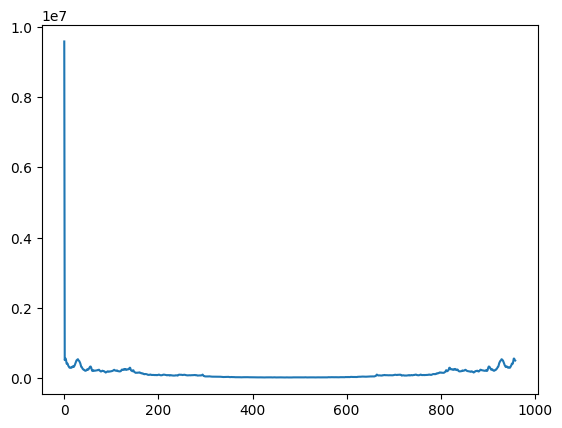

In [73]:
plt.plot(RMS_x)

## MAX_value_fft

In [74]:
tem1 = df_value.iloc[:,0].values
j=0
leng =int(len(tem1)/250-1)
m_z =m_y=m_x=np.empty(leng,dtype=float)
p=0
for i in range(500,len(tem1),250):
    x = df_value.iloc[j:i,2].values
    y = df_value.iloc[j:i,3].values
    m_x[p] = max(x) 
    m_y[p] = max(y)
    p=p+1
    j=i-250

df2["MAX_x_fft"] =m_x
df2["MAX_y_fft"] =m_y


C:\Users\rames\AppData\Local\Temp\ipykernel_29640\4112878159.py:9: ComplexWarning: Casting complex values to real discards the imaginary part
  m_x[p] = max(x)
C:\Users\rames\AppData\Local\Temp\ipykernel_29640\4112878159.py:10: ComplexWarning: Casting complex values to real discards the imaginary part
  m_y[p] = max(y)


## MIN_value_fft

In [75]:
tem1 = df_value.iloc[:,0].values
j=0
leng =int(len(tem1)/250-1)
m_z =m_y=m_x=np.empty(leng,dtype=float)
p=0
for i in range(500,len(tem1),250):
    x = df_value.iloc[j:i,2].values
    y = df_value.iloc[j:i,3].values
    m_x[p] = min(x) 
    m_y[p] = min(y)
    p=p+1
    j=i-250

df2["MIN_x_fft"] =m_x
df2["MIN_y_fft"] =m_y


C:\Users\rames\AppData\Local\Temp\ipykernel_29640\93130689.py:9: ComplexWarning: Casting complex values to real discards the imaginary part
  m_x[p] = min(x)
C:\Users\rames\AppData\Local\Temp\ipykernel_29640\93130689.py:10: ComplexWarning: Casting complex values to real discards the imaginary part
  m_y[p] = min(y)


## Entropy_fft

In [76]:

def estimate_shannon_entropy(sequence):
    m = len(sequence)
    bases = collections.Counter([tmp_base for tmp_base in sequence])
 
    shannon_entropy_value = 0
    for base in bases:
        # number of residues
        n_i = bases[base]
        # n_i (# residues type i) / M (# residues in column)
        p_i = n_i / float(m)
        entropy_i = p_i * (math.log(p_i, 2))
        shannon_entropy_value += entropy_i
 
    return shannon_entropy_value * -1

In [77]:
tem1 = df_value.iloc[:,0].values
j=0
leng =int(len(tem1)/250-1)
m_z =m_y=m_x=np.empty(leng,dtype=float)
p=0
for i in range(500,len(tem1),250):
    x = df_value.iloc[j:i,2].values
    y = df_value.iloc[j:i,3].values
    m_x[p] = estimate_shannon_entropy(x) 
    m_y[p] = estimate_shannon_entropy(y)
    p=p+1
    j=i-250

df2["Antropy_x_fft"] =m_x
df2["Antropy_y_fft"] =m_y


## skewness__fft

In [78]:
tem1 = df_value.iloc[:,0].values
j=0
leng =int(len(tem1)/250-1)
skew_z =skew_y=skew_x=np.empty(leng,dtype=float)
p=0
for i in range(500,len(tem1),250):
    x = df_value.iloc[j:i,2].values
    y = df_value.iloc[j:i,3].values
    skew_x[p] = skew(abs(x), axis=0, bias=True)
    skew_y[p] = skew(abs(y), axis=0, bias=True)
    p=p+1
    j=i-250

df2["skewness_x_fft"] =skew_x
df2["skewness_y_fft"] =skew_y


## Kurtosis_fft

In [79]:
tem1 = df_value.iloc[:,0].values
j=0
leng =int(len(tem1)/250-1)
skew_z =skew_y=skew_x=np.empty(leng,dtype=float)
p=0
for i in range(500,len(tem1),250):
    x = df_value.iloc[j:i,2].values
    y = df_value.iloc[j:i,3].values
    skew_x[p] = kurtosis(abs(x), axis=0, bias=True)
    skew_y[p] = kurtosis(abs(y), axis=0, bias=True)
   
    p=p+1
    j=i-250

df2["kurtosis_x_fft"] =skew_x
df2["kurtosis_y_fft"] =skew_y


In [80]:
print(df2 ,end= " ")

         mean_x      mean_y  mean_abs_x  mean_abs_y    median_x    median_y  \
0    888.574276  888.574276  888.574276  888.574276  888.426128  888.426128   
1    888.939783  888.939783  888.939783  888.939783  888.580444  888.580444   
2    889.435589  889.435589  889.435589  889.435589  888.884697  888.884697   
3    889.436641  889.436641  889.436641  889.436641  889.048364  889.048364   
4    889.121660  889.121660  889.121660  889.121660  889.369238  889.369238   
..          ...         ...         ...         ...         ...         ...   
954  732.438569  732.438569  732.438569  732.438569  758.496084  758.496084   
955  808.077533  808.077533  808.077533  808.077533  777.191929  777.191929   
956  811.220035  811.220035  811.220035  811.220035  782.051180  782.051180   
957  756.566956  756.566956  756.566956  756.566956  763.101744  763.101744   
958  700.615267  700.615267  700.615267  700.615267  723.632565  723.632565   

         mode_x      mode_y    variance_x    varian

In [81]:
df2

,mean_x,mean_y,mean_abs_x,mean_abs_y,median_x,median_y,mode_x,mode_y,variance_x,variance_y,...,MAX_x_fft,MAX_y_fft,MIN_x_fft,MIN_y_fft,Antropy_x_fft,Antropy_y_fft,skewness_x_fft,skewness_y_fft,kurtosis_x_fft,kurtosis_y_fft
0,888.574276,888.574276,888.574276,888.574276,888.426128,888.426128,889.258492,889.258492,46.978548,46.978548,...,2.138742e+08,2.138742e+08,-1.325851e+06,-1.325851e+06,8.965784,8.965784,22.273589,22.273589,494.409834,494.409834
1,888.939783,888.939783,888.939783,888.939783,888.580444,888.580444,888.084327,888.084327,29.080877,29.080877,...,1.046771e+06,1.046771e+06,-9.292707e+05,-9.292707e+05,8.965784,8.965784,0.360066,0.360066,-0.383044,-0.383044
2,889.435589,889.435589,889.435589,889.435589,888.884697,888.884697,886.158900,886.158900,34.417220,34.417220,...,1.121407e+06,1.121407e+06,-1.145925e+06,-1.145925e+06,8.965784,8.965784,0.530281,0.530281,0.344256,0.344256
3,889.436641,889.436641,889.436641,889.436641,889.048364,889.048364,879.421299,879.421299,38.174841,38.174841,...,1.121407e+06,1.121407e+06,-1.159925e+06,-1.159925e+06,8.965784,8.965784,0.613618,0.613618,0.314805,0.314805
4,889.121660,889.121660,889.121660,889.121660,889.369238,889.369238,879.421299,879.421299,86.932866,86.932866,...,1.012212e+06,1.012212e+06,-1.159925e+06,-1.159925e+06,8.965784,8.965784,0.612737,0.612737,-0.108735,-0.108735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
954,732.438569,732.438569,732.438569,732.438569,758.496084,758.496084,956.460772,956.460772,31418.202819,31418.202819,...,1.012212e+06,1.012212e+06,-1.159925e+06,-1.159925e+06,8.965784,8.965784,0.622552,0.622552,-0.090139,-0.090139
955,808.077533,808.077533,808.077533,808.077533,777.191929,777.191929,956.460772,956.460772,28713.587381,28713.587381,...,1.121407e+06,1.121407e+06,-1.159925e+06,-1.159925e+06,8.965784,8.965784,0.605269,0.605269,0.308870,0.308870
956,811.220035,811.220035,811.220035,811.220035,782.051180,782.051180,739.807834,739.807834,17791.535057,17791.535057,...,1.121407e+06,1.121407e+06,-1.145925e+06,-1.145925e+06,8.965784,8.965784,0.542871,0.542871,0.352678,0.352678
957,756.566956,756.566956,756.566956,756.566956,763.101744,763.101744,739.807834,739.807834,1906.734229,1906.734229,...,1.046771e+06,1.046771e+06,-9.292707e+05,-9.292707e+05,8.965784,8.965784,0.364149,0.364149,-0.395073,-0.395073


In [82]:
len(df2)

959

In [83]:
# df2.drop(df2.columns[0], axis=1, inplace=True)
# df2

## Velocity

In [84]:

# df3 = pd.read_csv(r"C:\new\BTP\BTP data\Rash and Aggressive Driving\My Experiment 2022-10-13 19-57-37\Location.csv") 
df3 = pd.read_csv(r"C:\new\BTP\BTP data\Rash and Aggressive Driving\My Experiment 2022-10-13 20-11-37\Location.csv") # for test 
velocity =df3.iloc[:,4].values 

In [85]:
# df3

In [86]:
velocity
len(velocity)

479

In [87]:
479/959

0.4994786235662148

In [88]:
# print(878/959, end= " ")
print(878/1806, end= " ")


0.48615725359911405 

In [89]:
la= np.arange(1,len(velocity),0.49923148)# length is equal to feature length  #velocity
tem_vel= np.arange(1,len(velocity)+1,1)
print(len(tem_vel))
print(la.size)
new_velo =interp1d(tem_vel,velocity)
# la= np.arange(1,len(velocity),0.48615725359911405  )# length is equal to feature length  #velocity
# tem_vel= np.arange(1,len(velocity)+1,1)
# print(len(tem_vel))
# print(la.size)
# new_velo =interp1d(tem_vel,velocity)

479
958


In [90]:
len(la)

958

In [91]:
df2

,mean_x,mean_y,mean_abs_x,mean_abs_y,median_x,median_y,mode_x,mode_y,variance_x,variance_y,...,MAX_x_fft,MAX_y_fft,MIN_x_fft,MIN_y_fft,Antropy_x_fft,Antropy_y_fft,skewness_x_fft,skewness_y_fft,kurtosis_x_fft,kurtosis_y_fft
0,888.574276,888.574276,888.574276,888.574276,888.426128,888.426128,889.258492,889.258492,46.978548,46.978548,...,2.138742e+08,2.138742e+08,-1.325851e+06,-1.325851e+06,8.965784,8.965784,22.273589,22.273589,494.409834,494.409834
1,888.939783,888.939783,888.939783,888.939783,888.580444,888.580444,888.084327,888.084327,29.080877,29.080877,...,1.046771e+06,1.046771e+06,-9.292707e+05,-9.292707e+05,8.965784,8.965784,0.360066,0.360066,-0.383044,-0.383044
2,889.435589,889.435589,889.435589,889.435589,888.884697,888.884697,886.158900,886.158900,34.417220,34.417220,...,1.121407e+06,1.121407e+06,-1.145925e+06,-1.145925e+06,8.965784,8.965784,0.530281,0.530281,0.344256,0.344256
3,889.436641,889.436641,889.436641,889.436641,889.048364,889.048364,879.421299,879.421299,38.174841,38.174841,...,1.121407e+06,1.121407e+06,-1.159925e+06,-1.159925e+06,8.965784,8.965784,0.613618,0.613618,0.314805,0.314805
4,889.121660,889.121660,889.121660,889.121660,889.369238,889.369238,879.421299,879.421299,86.932866,86.932866,...,1.012212e+06,1.012212e+06,-1.159925e+06,-1.159925e+06,8.965784,8.965784,0.612737,0.612737,-0.108735,-0.108735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
954,732.438569,732.438569,732.438569,732.438569,758.496084,758.496084,956.460772,956.460772,31418.202819,31418.202819,...,1.012212e+06,1.012212e+06,-1.159925e+06,-1.159925e+06,8.965784,8.965784,0.622552,0.622552,-0.090139,-0.090139
955,808.077533,808.077533,808.077533,808.077533,777.191929,777.191929,956.460772,956.460772,28713.587381,28713.587381,...,1.121407e+06,1.121407e+06,-1.159925e+06,-1.159925e+06,8.965784,8.965784,0.605269,0.605269,0.308870,0.308870
956,811.220035,811.220035,811.220035,811.220035,782.051180,782.051180,739.807834,739.807834,17791.535057,17791.535057,...,1.121407e+06,1.121407e+06,-1.145925e+06,-1.145925e+06,8.965784,8.965784,0.542871,0.542871,0.352678,0.352678
957,756.566956,756.566956,756.566956,756.566956,763.101744,763.101744,739.807834,739.807834,1906.734229,1906.734229,...,1.046771e+06,1.046771e+06,-9.292707e+05,-9.292707e+05,8.965784,8.965784,0.364149,0.364149,-0.395073,-0.395073


In [92]:
la.size

958

In [ ]:
p=0
# velo=np.empty(len(la),dtype=float)
velo=np.empty(len(la),dtype=float)
for i in la:

    velo[p]= new_velo(i)
    c=new_velo(i)
    print(i,c)
    p=p+1 
    
    
    
df2["velocity"] =velo


In [ ]:
velo.size

1804

In [ ]:
df2

,mean_x,mean_y,mean_abs_x,mean_abs_y,median_x,median_y,mode_x,mode_y,variance_x,variance_y,...,MAX_y_fft,MIN_x_fft,MIN_y_fft,Antropy_x_fft,Antropy_y_fft,skewness_x_fft,skewness_y_fft,kurtosis_x_fft,kurtosis_y_fft,velocity
0,899.763248,899.763248,899.763248,899.763248,900.259174,900.259174,902.353130,902.353130,28.657157,28.657157,...,4.085693e+08,-2.982018e+06,-2.982018e+06,8.965784,8.965784,22.266498,22.266498,494.199419,494.199419,0.000000
1,900.253747,900.253747,900.253747,900.253747,899.947781,899.947781,902.082753,902.082753,75.702947,75.702947,...,2.684778e+06,-2.982018e+06,-2.982018e+06,8.965784,8.965784,0.585323,0.585323,0.392806,0.392806,0.000000
2,900.397879,900.397879,900.397879,900.397879,899.794595,899.794595,889.849599,889.849599,106.228156,106.228156,...,2.684778e+06,-2.581308e+06,-2.581308e+06,8.965784,8.965784,0.564611,0.564611,0.048123,0.048123,0.000000
3,899.967080,899.967080,899.967080,899.967080,899.844842,899.844842,900.705719,900.705719,76.677448,76.677448,...,2.238488e+06,-1.890515e+06,-1.890515e+06,8.965784,8.965784,0.705407,0.705407,0.343434,0.343434,2.787508
4,899.874782,899.874782,899.874782,899.874782,899.623314,899.623314,895.374191,895.374191,168.756839,168.756839,...,2.201406e+06,-1.997817e+06,-1.997817e+06,8.965784,8.965784,0.632217,0.632217,0.195718,0.195718,5.743344
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1799,736.134097,736.134097,736.134097,736.134097,753.680749,753.680749,691.194330,691.194330,20007.289507,20007.289507,...,2.201406e+06,-2.176951e+06,-2.176951e+06,8.965784,8.965784,0.611321,0.611321,0.143313,0.143313,0.000000
1800,798.995538,798.995538,798.995538,798.995538,797.585141,797.585141,797.585141,797.585141,3149.977550,3149.977550,...,2.238488e+06,-1.890515e+06,-1.890515e+06,8.965784,8.965784,0.701589,0.701589,0.303907,0.303907,0.000000
1801,836.139183,836.139183,836.139183,836.139183,815.887808,815.887808,849.855777,849.855777,13546.814020,13546.814020,...,2.684778e+06,-2.136271e+06,-2.136271e+06,8.965784,8.965784,0.559961,0.559961,0.014028,0.014028,0.000000
1802,864.644809,864.644809,864.644809,864.644809,919.953201,919.953201,930.965985,930.965985,21133.611771,21133.611771,...,2.684778e+06,-2.982018e+06,-2.982018e+06,8.965784,8.965784,0.559559,0.559559,0.282591,0.282591,0.000000


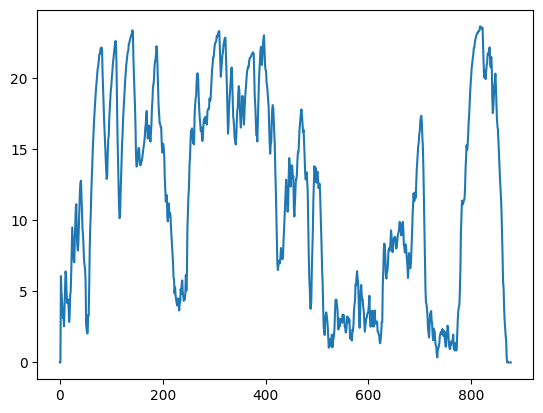

In [ ]:
plt.plot(velocity)

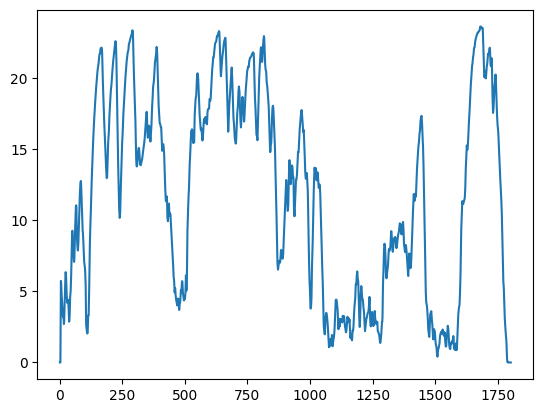

In [ ]:
plt.plot(df2.iloc[:,-1].values)

In [ ]:
df2

,mean_x,mean_y,mean_abs_x,mean_abs_y,median_x,median_y,mode_x,mode_y,variance_x,variance_y,...,MAX_y_fft,MIN_x_fft,MIN_y_fft,Antropy_x_fft,Antropy_y_fft,skewness_x_fft,skewness_y_fft,kurtosis_x_fft,kurtosis_y_fft,velocity
0,899.763248,899.763248,899.763248,899.763248,900.259174,900.259174,902.353130,902.353130,28.657157,28.657157,...,4.085693e+08,-2.982018e+06,-2.982018e+06,8.965784,8.965784,22.266498,22.266498,494.199419,494.199419,0.000000
1,900.253747,900.253747,900.253747,900.253747,899.947781,899.947781,902.082753,902.082753,75.702947,75.702947,...,2.684778e+06,-2.982018e+06,-2.982018e+06,8.965784,8.965784,0.585323,0.585323,0.392806,0.392806,0.000000
2,900.397879,900.397879,900.397879,900.397879,899.794595,899.794595,889.849599,889.849599,106.228156,106.228156,...,2.684778e+06,-2.581308e+06,-2.581308e+06,8.965784,8.965784,0.564611,0.564611,0.048123,0.048123,0.000000
3,899.967080,899.967080,899.967080,899.967080,899.844842,899.844842,900.705719,900.705719,76.677448,76.677448,...,2.238488e+06,-1.890515e+06,-1.890515e+06,8.965784,8.965784,0.705407,0.705407,0.343434,0.343434,2.787508
4,899.874782,899.874782,899.874782,899.874782,899.623314,899.623314,895.374191,895.374191,168.756839,168.756839,...,2.201406e+06,-1.997817e+06,-1.997817e+06,8.965784,8.965784,0.632217,0.632217,0.195718,0.195718,5.743344
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1799,736.134097,736.134097,736.134097,736.134097,753.680749,753.680749,691.194330,691.194330,20007.289507,20007.289507,...,2.201406e+06,-2.176951e+06,-2.176951e+06,8.965784,8.965784,0.611321,0.611321,0.143313,0.143313,0.000000
1800,798.995538,798.995538,798.995538,798.995538,797.585141,797.585141,797.585141,797.585141,3149.977550,3149.977550,...,2.238488e+06,-1.890515e+06,-1.890515e+06,8.965784,8.965784,0.701589,0.701589,0.303907,0.303907,0.000000
1801,836.139183,836.139183,836.139183,836.139183,815.887808,815.887808,849.855777,849.855777,13546.814020,13546.814020,...,2.684778e+06,-2.136271e+06,-2.136271e+06,8.965784,8.965784,0.559961,0.559961,0.014028,0.014028,0.000000
1802,864.644809,864.644809,864.644809,864.644809,919.953201,919.953201,930.965985,930.965985,21133.611771,21133.611771,...,2.684778e+06,-2.982018e+06,-2.982018e+06,8.965784,8.965784,0.559559,0.559559,0.282591,0.282591,0.000000


## lebal pra

In [ ]:
# tem1 = df_value.iloc[:,0].values
# print(tem1)
# leng =int(len(tem1)/250-1)
# print(leng)
# lebal_data=np.empty(leng,dtype=float)
# p=0
# for i in range(leng):
#     if lab_pra[i] < 100000:
#         lebal_data[p] =0
#     else: 
#         lebal_data[p]=1
#     p=p+1
# df2["lebal_tim"] =lebal_data




tem1 = df_value.iloc[:,0].values
print(tem1)
leng =int(len(tem1)/250-1)
print(leng)
lebal_data=np.empty(leng,dtype=float)
p=0
for i in range(leng):
    if lab_pra[i] < 100000:
        lebal_data[p] =0
    else: 
        lebal_data[p]=1
    p=p+1
test_df["lebal_tim"] =lebal_data


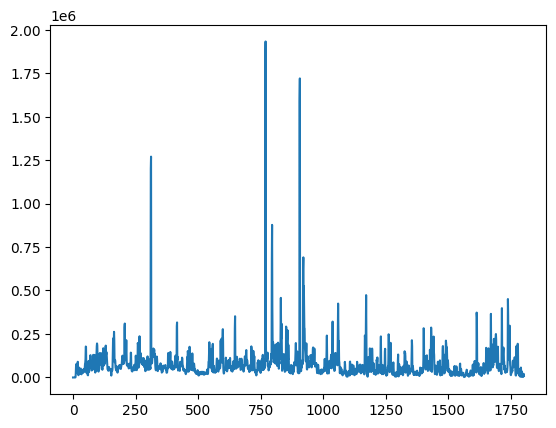

In [ ]:
plt.plot(Lab_pra)


<function matplotlib.pyplot.show(close=None, block=None)>

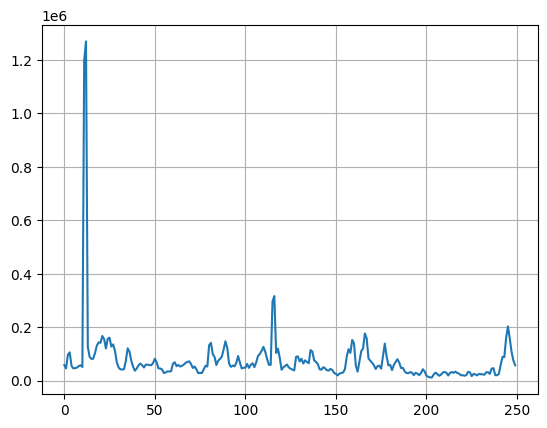

In [ ]:
x= lab_pra[300:550]

plt.plot(x)
plt.grid()
plt.show

In [ ]:
df2

,mean_x,mean_y,mean_abs_x,mean_abs_y,median_x,median_y,mode_x,mode_y,variance_x,variance_y,...,MIN_x_fft,MIN_y_fft,Antropy_x_fft,Antropy_y_fft,skewness_x_fft,skewness_y_fft,kurtosis_x_fft,kurtosis_y_fft,velocity,lebal_tim
0,899.763248,899.763248,899.763248,899.763248,900.259174,900.259174,902.353130,902.353130,28.657157,28.657157,...,-2.982018e+06,-2.982018e+06,8.965784,8.965784,22.266498,22.266498,494.199419,494.199419,0.000000,0.0
1,900.253747,900.253747,900.253747,900.253747,899.947781,899.947781,902.082753,902.082753,75.702947,75.702947,...,-2.982018e+06,-2.982018e+06,8.965784,8.965784,0.585323,0.585323,0.392806,0.392806,0.000000,0.0
2,900.397879,900.397879,900.397879,900.397879,899.794595,899.794595,889.849599,889.849599,106.228156,106.228156,...,-2.581308e+06,-2.581308e+06,8.965784,8.965784,0.564611,0.564611,0.048123,0.048123,0.000000,0.0
3,899.967080,899.967080,899.967080,899.967080,899.844842,899.844842,900.705719,900.705719,76.677448,76.677448,...,-1.890515e+06,-1.890515e+06,8.965784,8.965784,0.705407,0.705407,0.343434,0.343434,2.787508,0.0
4,899.874782,899.874782,899.874782,899.874782,899.623314,899.623314,895.374191,895.374191,168.756839,168.756839,...,-1.997817e+06,-1.997817e+06,8.965784,8.965784,0.632217,0.632217,0.195718,0.195718,5.743344,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1799,736.134097,736.134097,736.134097,736.134097,753.680749,753.680749,691.194330,691.194330,20007.289507,20007.289507,...,-2.176951e+06,-2.176951e+06,8.965784,8.965784,0.611321,0.611321,0.143313,0.143313,0.000000,0.0
1800,798.995538,798.995538,798.995538,798.995538,797.585141,797.585141,797.585141,797.585141,3149.977550,3149.977550,...,-1.890515e+06,-1.890515e+06,8.965784,8.965784,0.701589,0.701589,0.303907,0.303907,0.000000,0.0
1801,836.139183,836.139183,836.139183,836.139183,815.887808,815.887808,849.855777,849.855777,13546.814020,13546.814020,...,-2.136271e+06,-2.136271e+06,8.965784,8.965784,0.559961,0.559961,0.014028,0.014028,0.000000,0.0
1802,864.644809,864.644809,864.644809,864.644809,919.953201,919.953201,930.965985,930.965985,21133.611771,21133.611771,...,-2.982018e+06,-2.982018e+06,8.965784,8.965784,0.559559,0.559559,0.282591,0.282591,0.000000,0.0


## linear_regression

In [ ]:
print(df2.iloc[:,:60])

          mean_x      mean_y  mean_abs_x  mean_abs_y    median_x    median_y  \
0     899.763248  899.763248  899.763248  899.763248  900.259174  900.259174   
1     900.253747  900.253747  900.253747  900.253747  899.947781  899.947781   
2     900.397879  900.397879  900.397879  900.397879  899.794595  899.794595   
3     899.967080  899.967080  899.967080  899.967080  899.844842  899.844842   
4     899.874782  899.874782  899.874782  899.874782  899.623314  899.623314   
...          ...         ...         ...         ...         ...         ...   
1799  736.134097  736.134097  736.134097  736.134097  753.680749  753.680749   
1800  798.995538  798.995538  798.995538  798.995538  797.585141  797.585141   
1801  836.139183  836.139183  836.139183  836.139183  815.887808  815.887808   
1802  864.644809  864.644809  864.644809  864.644809  919.953201  919.953201   
1803  852.249805  852.249805  852.249805  852.249805  825.317090  825.317090   

          mode_x      mode_y    varianc

In [ ]:
label_column=df2.iloc[:,-1].values
feat_data= df2.iloc[:,0:59]

In [ ]:
feat_data

,mean_x,mean_y,mean_abs_x,mean_abs_y,median_x,median_y,mode_x,mode_y,variance_x,variance_y,...,MAX_y_fft,MIN_x_fft,MIN_y_fft,Antropy_x_fft,Antropy_y_fft,skewness_x_fft,skewness_y_fft,kurtosis_x_fft,kurtosis_y_fft,velocity
0,899.763248,899.763248,899.763248,899.763248,900.259174,900.259174,902.353130,902.353130,28.657157,28.657157,...,4.085693e+08,-2.982018e+06,-2.982018e+06,8.965784,8.965784,22.266498,22.266498,494.199419,494.199419,0.000000
1,900.253747,900.253747,900.253747,900.253747,899.947781,899.947781,902.082753,902.082753,75.702947,75.702947,...,2.684778e+06,-2.982018e+06,-2.982018e+06,8.965784,8.965784,0.585323,0.585323,0.392806,0.392806,0.000000
2,900.397879,900.397879,900.397879,900.397879,899.794595,899.794595,889.849599,889.849599,106.228156,106.228156,...,2.684778e+06,-2.581308e+06,-2.581308e+06,8.965784,8.965784,0.564611,0.564611,0.048123,0.048123,0.000000
3,899.967080,899.967080,899.967080,899.967080,899.844842,899.844842,900.705719,900.705719,76.677448,76.677448,...,2.238488e+06,-1.890515e+06,-1.890515e+06,8.965784,8.965784,0.705407,0.705407,0.343434,0.343434,2.787508
4,899.874782,899.874782,899.874782,899.874782,899.623314,899.623314,895.374191,895.374191,168.756839,168.756839,...,2.201406e+06,-1.997817e+06,-1.997817e+06,8.965784,8.965784,0.632217,0.632217,0.195718,0.195718,5.743344
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1799,736.134097,736.134097,736.134097,736.134097,753.680749,753.680749,691.194330,691.194330,20007.289507,20007.289507,...,2.201406e+06,-2.176951e+06,-2.176951e+06,8.965784,8.965784,0.611321,0.611321,0.143313,0.143313,0.000000
1800,798.995538,798.995538,798.995538,798.995538,797.585141,797.585141,797.585141,797.585141,3149.977550,3149.977550,...,2.238488e+06,-1.890515e+06,-1.890515e+06,8.965784,8.965784,0.701589,0.701589,0.303907,0.303907,0.000000
1801,836.139183,836.139183,836.139183,836.139183,815.887808,815.887808,849.855777,849.855777,13546.814020,13546.814020,...,2.684778e+06,-2.136271e+06,-2.136271e+06,8.965784,8.965784,0.559961,0.559961,0.014028,0.014028,0.000000
1802,864.644809,864.644809,864.644809,864.644809,919.953201,919.953201,930.965985,930.965985,21133.611771,21133.611771,...,2.684778e+06,-2.982018e+06,-2.982018e+06,8.965784,8.965784,0.559559,0.559559,0.282591,0.282591,0.000000


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(feat_data,label_column,test_size = 0.1,random_state=0)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train= sc.fit_transform(x_train)
x_test= sc.transform(x_test)

In [ ]:

from sklearn.linear_model import LinearRegression  #linearregression is use for gradientDecant,genereting Thita 0,1 
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [ ]:
print(regressor.coef_,regressor.intercept_)

[-3.49738861e+12  1.16579620e+12  1.16579620e+12  1.16579620e+12
 -2.80761719e-03 -2.50244141e-03  3.29589844e-03  2.99072266e-03
 -1.16241455e-01 -1.10961914e-01  1.80358887e-01  1.81396484e-01
 -5.32836914e-02 -5.37719727e-02 -1.12304688e-02 -1.21459961e-02
  2.51464844e-02  2.49023438e-02  2.92541504e-01  2.91915894e-01
 -2.38685608e-02 -2.37541199e-02  1.74522400e-02  1.79634094e-02
  7.39479065e-03  7.79438019e-03  6.03532791e-03  7.07691908e-03
  1.52761805e-02  1.68735310e-02  3.40473808e-01  3.39740539e-01
  2.56028001e-04  5.72204590e-04 -8.64467621e-02 -8.67996216e-02
  1.26500130e+00  1.26495171e+00 -1.12251282e-01 -1.12785339e-01
  2.62451172e-02  2.63671875e-02  2.86865234e-03  2.41088867e-03
 -6.75964355e-02 -6.82373047e-02 -8.32664490e-01 -8.33236694e-01
 -6.73126221e-01 -6.73614502e-01 -8.33129883e-03 -7.96508789e-03
  0.00000000e+00  0.00000000e+00 -1.23443604e-02 -1.22756958e-02
  2.05013275e-01  2.04615318e-01 -1.26206564e-02] 0.21873074553296548


In [ ]:
#x_test,y_test

In [ ]:
y_pred = regressor.predict(test_df)
print(y_pred.size)
print(y_test.size)

959
181


c:\Users\rames\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [ ]:
# from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score
# cm=confusion_matrix(y_test,y_pred)
# print(cm)
# print("accuracy score"+ str(accuracy_score(y_test,y_pred)))
# print("precision score "+str(precision_score(y_test,y_pred)))
# print("recall score"+str(recall_score(y_test,y_pred)))

## LogisticRegression

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(feat_data,label_column,test_size = 0.01,random_state=0)
x_cheak=x_test

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train= sc.fit_transform(x_train)
x_test= sc.transform(x_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='liblinear', random_state=0)
model.fit(x_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [ ]:
test_df

,mean_x,mean_y,mean_abs_x,mean_abs_y,median_x,median_y,mode_x,mode_y,variance_x,variance_y,...,MAX_y_fft,MIN_x_fft,MIN_y_fft,Antropy_x_fft,Antropy_y_fft,skewness_x_fft,skewness_y_fft,kurtosis_x_fft,kurtosis_y_fft,velocity
0,888.574276,888.574276,888.574276,888.574276,888.426128,888.426128,889.258492,889.258492,46.978548,46.978548,...,2.138742e+08,-1.325851e+06,-1.325851e+06,8.965784,8.965784,22.273589,22.273589,494.409834,494.409834,0.000000
1,888.939783,888.939783,888.939783,888.939783,888.580444,888.580444,888.084327,888.084327,29.080877,29.080877,...,1.046771e+06,-9.292707e+05,-9.292707e+05,8.965784,8.965784,0.360066,0.360066,-0.383044,-0.383044,0.000000
2,889.435589,889.435589,889.435589,889.435589,888.884697,888.884697,886.158900,886.158900,34.417220,34.417220,...,1.121407e+06,-1.145925e+06,-1.145925e+06,8.965784,8.965784,0.530281,0.530281,0.344256,0.344256,5.046522
3,889.436641,889.436641,889.436641,889.436641,889.048364,889.048364,879.421299,879.421299,38.174841,38.174841,...,1.121407e+06,-1.159925e+06,-1.159925e+06,8.965784,8.965784,0.613618,0.613618,0.314805,0.314805,5.267917
4,889.121660,889.121660,889.121660,889.121660,889.369238,889.369238,879.421299,879.421299,86.932866,86.932866,...,1.012212e+06,-1.159925e+06,-1.159925e+06,8.965784,8.965784,0.612737,0.612737,-0.108735,-0.108735,4.626978
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
954,732.438569,732.438569,732.438569,732.438569,758.496084,758.496084,956.460772,956.460772,31418.202819,31418.202819,...,1.012212e+06,-1.159925e+06,-1.159925e+06,8.965784,8.965784,0.622552,0.622552,-0.090139,-0.090139,0.000000
955,808.077533,808.077533,808.077533,808.077533,777.191929,777.191929,956.460772,956.460772,28713.587381,28713.587381,...,1.121407e+06,-1.159925e+06,-1.159925e+06,8.965784,8.965784,0.605269,0.605269,0.308870,0.308870,0.000000
956,811.220035,811.220035,811.220035,811.220035,782.051180,782.051180,739.807834,739.807834,17791.535057,17791.535057,...,1.121407e+06,-1.145925e+06,-1.145925e+06,8.965784,8.965784,0.542871,0.542871,0.352678,0.352678,0.000000
957,756.566956,756.566956,756.566956,756.566956,763.101744,763.101744,739.807834,739.807834,1906.734229,1906.734229,...,1.046771e+06,-9.292707e+05,-9.292707e+05,8.965784,8.965784,0.364149,0.364149,-0.395073,-0.395073,0.000000


In [ ]:
y_pred = model.predict(test_df)
print(y_pred)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.

c:\Users\rames\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [ ]:
x_cheak.iloc[:,:]

,mean_x,mean_y,mean_abs_x,mean_abs_y,median_x,median_y,mode_x,mode_y,variance_x,variance_y,...,MAX_y_fft,MIN_x_fft,MIN_y_fft,Antropy_x_fft,Antropy_y_fft,skewness_x_fft,skewness_y_fft,kurtosis_x_fft,kurtosis_y_fft,velocity
487,904.456331,904.456331,904.456331,904.456331,925.981779,925.981779,628.276930,628.276930,47368.259247,47368.259247,...,1.451593e+05,-1.744814e+05,-1.744814e+05,8.965784,8.965784,0.762827,0.762827,0.291686,0.291686,5.403765
276,874.473923,874.473923,874.473923,874.473923,844.957972,844.957972,844.957972,844.957972,98744.735344,98744.735344,...,3.511999e+05,-3.876552e+05,-3.876552e+05,8.965784,8.965784,0.604154,0.604154,0.196832,0.196832,22.447175
814,860.847699,860.847699,860.847699,860.847699,838.840765,838.840765,853.022180,853.022180,193350.751974,193350.751974,...,7.180273e+04,-6.884116e+04,-6.884116e+04,8.965784,8.965784,0.549902,0.549902,-0.183946,-0.183946,22.714762
1601,966.774790,966.774790,966.774790,966.774790,928.612071,928.612071,1154.738269,1154.738269,19630.766623,19630.766623,...,2.861150e+05,-3.074539e+05,-3.074539e+05,8.965784,8.965784,0.576703,0.576703,-0.256759,-0.256759,5.596644
161,902.512846,902.512846,902.512846,902.512846,878.464237,878.464237,1028.882806,1028.882806,225455.450200,225455.450200,...,3.229765e+05,-3.006547e+05,-3.006547e+05,8.965784,8.965784,0.571795,0.571795,0.080034,0.080034,21.833100
156,897.963469,897.963469,897.963469,897.963469,898.460226,898.460226,794.104504,794.104504,41347.787729,41347.787729,...,3.709905e+05,-3.635172e+05,-3.635172e+05,8.965784,8.965784,0.609068,0.609068,-0.131054,-0.131054,21.368238
1714,569.692491,569.692491,569.692491,569.692491,755.235292,755.235292,755.235292,755.235292,206153.149239,206153.149239,...,5.166717e+05,-4.514476e+05,-4.514476e+05,8.965784,8.965784,0.665957,0.665957,0.426775,0.426775,21.720087
526,873.989606,873.989606,873.989606,873.989606,851.886329,851.886329,836.064109,836.064109,24605.507161,24605.507161,...,1.269358e+05,-1.133488e+05,-1.133488e+05,8.965784,8.965784,0.431823,0.431823,-0.310095,-0.310095,16.282812
182,885.543783,885.543783,885.543783,885.543783,862.249788,862.249788,918.495047,918.495047,53053.627509,53053.627509,...,2.643550e+05,-3.649328e+05,-3.649328e+05,8.965784,8.965784,0.664249,0.664249,0.319702,0.319702,14.902248
1227,985.809739,985.809739,985.809739,985.809739,969.269326,969.269326,935.252398,935.252398,28854.927336,28854.927336,...,9.874376e+04,-1.185945e+05,-1.185945e+05,8.965784,8.965784,0.558979,0.558979,-0.272571,-0.272571,3.161196


In [ ]:
y_pred = model.predict(x_test)
# print(y_pred)

In [ ]:
mis_value = pd.DataFrame()
mis_value=df2

In [ ]:
mis_value = mis_value[mis_value.lebal_tim!= 0]

In [ ]:
mis_value = mis_value[mis_value.lebal_tim!= 1]

In [ ]:
mis_value.drop(mis_value.columns[59], axis=1, inplace=True)

In [ ]:
mis_value

,mean_x,mean_y,mean_abs_x,mean_abs_y,median_x,median_y,mode_x,mode_y,variance_x,variance_y,...,MAX_y_fft,MIN_x_fft,MIN_y_fft,Antropy_x_fft,Antropy_y_fft,skewness_x_fft,skewness_y_fft,kurtosis_x_fft,kurtosis_y_fft,velocity


In [ ]:
loci =np.empty(len(y_test),dtype=float)
tem=0
po=0
for i in range(len(y_test)):
    if y_pred[i]==y_test[i]:
        loci[i]=int(1)
                 #save 1 for right 
    else: 
        loci[i]=int(0)
        po=po+1
    tem=tem+1
        

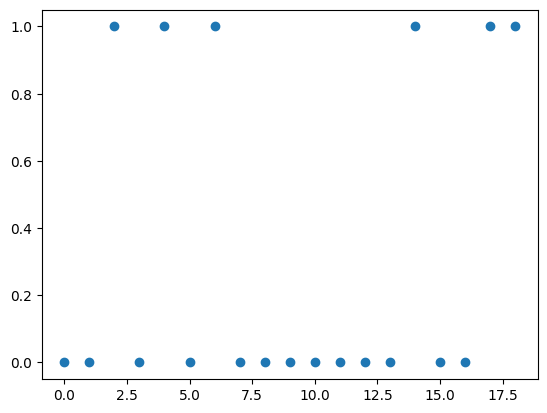

In [ ]:
plt.scatter(np.arange(0,len(y_test)),loci)

In [ ]:
p=0
for i in range(len(loci)):
    if loci[i]==0:        
        mis_value.loc[p] = x_cheak.iloc[i,:]
        p=p+1
    else:
        pass

In [ ]:
mis_value


,mean_x,mean_y,mean_abs_x,mean_abs_y,median_x,median_y,mode_x,mode_y,variance_x,variance_y,...,MAX_y_fft,MIN_x_fft,MIN_y_fft,Antropy_x_fft,Antropy_y_fft,skewness_x_fft,skewness_y_fft,kurtosis_x_fft,kurtosis_y_fft,velocity
0,904.456331,904.456331,904.456331,904.456331,925.981779,925.981779,628.276930,628.276930,47368.259247,47368.259247,...,1.451593e+05,-1.744814e+05,-1.744814e+05,8.965784,8.965784,0.762827,0.762827,0.291686,0.291686,5.403765
1,874.473923,874.473923,874.473923,874.473923,844.957972,844.957972,844.957972,844.957972,98744.735344,98744.735344,...,3.511999e+05,-3.876552e+05,-3.876552e+05,8.965784,8.965784,0.604154,0.604154,0.196832,0.196832,22.447175
2,966.774790,966.774790,966.774790,966.774790,928.612071,928.612071,1154.738269,1154.738269,19630.766623,19630.766623,...,2.861150e+05,-3.074539e+05,-3.074539e+05,8.965784,8.965784,0.576703,0.576703,-0.256759,-0.256759,5.596644
3,897.963469,897.963469,897.963469,897.963469,898.460226,898.460226,794.104504,794.104504,41347.787729,41347.787729,...,3.709905e+05,-3.635172e+05,-3.635172e+05,8.965784,8.965784,0.609068,0.609068,-0.131054,-0.131054,21.368238
4,873.989606,873.989606,873.989606,873.989606,851.886329,851.886329,836.064109,836.064109,24605.507161,24605.507161,...,1.269358e+05,-1.133488e+05,-1.133488e+05,8.965784,8.965784,0.431823,0.431823,-0.310095,-0.310095,16.282812
5,885.543783,885.543783,885.543783,885.543783,862.249788,862.249788,918.495047,918.495047,53053.627509,53053.627509,...,2.643550e+05,-3.649328e+05,-3.649328e+05,8.965784,8.965784,0.664249,0.664249,0.319702,0.319702,14.902248
6,985.809739,985.809739,985.809739,985.809739,969.269326,969.269326,935.252398,935.252398,28854.927336,28854.927336,...,9.874376e+04,-1.185945e+05,-1.185945e+05,8.965784,8.965784,0.558979,0.558979,-0.272571,-0.272571,3.161196
7,804.313777,804.313777,804.313777,804.313777,803.898628,803.898628,1061.582639,1061.582639,54202.956026,54202.956026,...,1.960969e+05,-1.684473e+05,-1.684473e+05,8.965784,8.965784,0.744066,0.744066,0.545501,0.545501,7.095581
8,888.590587,888.590587,888.590587,888.590587,861.805536,861.805536,843.621249,843.621249,70999.613560,70999.613560,...,3.131288e+05,-2.847917e+05,-2.847917e+05,8.965784,8.965784,0.692725,0.692725,0.400740,0.400740,12.981130
9,940.782504,940.782504,940.782504,940.782504,904.490477,904.490477,1294.076955,1294.076955,68167.035767,68167.035767,...,7.574094e+04,-7.225910e+04,-7.225910e+04,8.965784,8.965784,0.569268,0.569268,-0.103523,-0.103523,18.074783


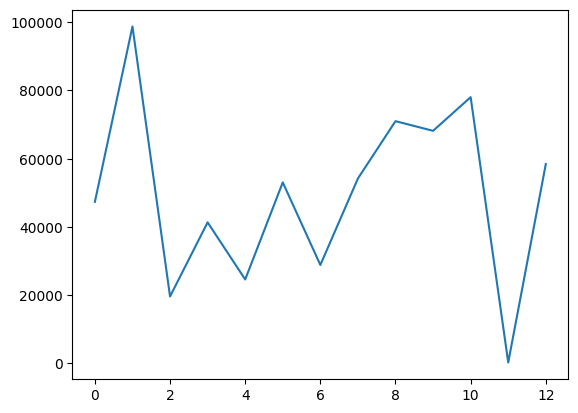

In [ ]:
va= mis_value.loc[:,"variance_x"]
plt.plot(va)

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score
cm=confusion_matrix(y_test,y_pred)
print(cm)
print("accuracy score"+ str(accuracy_score(y_test,y_pred)))
print("precision score "+str(precision_score(y_test,y_pred)))
print("recall score"+str(recall_score(y_test,y_pred)))

## Artifical _neural_netork

In [ ]:

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(feat_data,label_column,test_size = 1/3,random_state=0)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train= sc.fit_transform(x_train)
x_test= sc.transform(x_test)

In [ ]:
x_train,y_test


(array([[ 0.23625091,  0.23625091,  0.23625091, ..., -0.02641666,
         -0.02641666, -1.26849493],
        [-0.51591154, -0.51591154, -0.51591154, ..., -0.02601728,
         -0.02601728, -1.0640874 ],
        [-0.90563293, -0.90563293, -0.90563293, ..., -0.04252499,
         -0.04252499,  1.24689946],
        ...,
        [ 0.25374097,  0.25374097,  0.25374097, ..., -0.04172781,
         -0.04172781, -0.91704669],
        [ 0.22622758,  0.22622758,  0.22622758, ..., -0.02034391,
         -0.02034391, -1.0071158 ],
        [ 0.25068295,  0.25068295,  0.25068295, ..., -0.0375375 ,
         -0.0375375 , -1.30115209]]),
 array([0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0.,
        1., 0., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1.,
        1., 0., 1., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 1., 1., 0., 0.,
        1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0.,
        1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0

In [ ]:
ann = tf.keras.models.Sequential()

In [ ]:
ann.add(tf.keras.layers.Dense(units=6,activation='relu'))

In [ ]:
ann.add(tf.keras.layers.Dense(units=6,activation='relu'))

In [ ]:
ann.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

In [ ]:
ann.compile(optimizer= 'adam',loss= 'binary_crossentropy',metrics= ['accuracy'])


In [ ]:
ann.fit(x_train,y_train, batch_size=32,epochs=100)

Epoch 1/100
20/20 [==============================] - 0s 1ms/step - loss: 0.7020 - accuracy: 0.4648
Epoch 2/100
20/20 [==============================] - 0s 929us/step - loss: 0.6711 - accuracy: 0.6792
Epoch 3/100
20/20 [==============================] - 0s 819us/step - loss: 0.6480 - accuracy: 0.7840
Epoch 4/100
20/20 [==============================] - 0s 803us/step - loss: 0.6210 - accuracy: 0.8200
Epoch 5/100
20/20 [==============================] - 0s 850us/step - loss: 0.5889 - accuracy: 0.8545
Epoch 6/100
20/20 [==============================] - 0s 836us/step - loss: 0.5502 - accuracy: 0.8748
Epoch 7/100
20/20 [==============================] - 0s 918us/step - loss: 0.5072 - accuracy: 0.8826
Epoch 8/100
20/20 [==============================] - 0s 966us/step - loss: 0.4597 - accuracy: 0.8983
Epoch 9/100
20/20 [==============================] - 0s 850us/step - loss: 0.4121 - accuracy: 0.9108
Epoch 10/100
20/20 [==============================] - 0s 832us/step - loss: 0.3653 - accuracy

In [ ]:
y_pred = ann.predict(x_test)
print(y_pred)

10/10 [==============================] - 0s 666us/step
[[1.29313063e-04]
 [4.51328742e-06]
 [3.36690846e-07]
 [1.00000000e+00]
 [9.99999762e-01]
 [3.68849695e-01]
 [1.00000000e+00]
 [1.00000000e+00]
 [9.02048269e-10]
 [9.97150600e-01]
 [1.62698596e-03]
 [1.69410242e-03]
 [1.19756252e-01]
 [6.59951038e-05]
 [1.00000000e+00]
 [2.61446530e-05]
 [4.40494250e-06]
 [1.00000000e+00]
 [2.19436106e-03]
 [1.00000000e+00]
 [1.09360667e-06]
 [1.00000000e+00]
 [7.17582107e-02]
 [8.80467724e-06]
 [7.20733588e-05]
 [8.25599636e-05]
 [9.99999821e-01]
 [1.69566318e-01]
 [1.03667502e-04]
 [2.84961470e-06]
 [5.25471210e-01]
 [1.68723901e-07]
 [2.85194963e-02]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.36125141e-06]
 [9.99999583e-01]
 [2.24269211e-01]
 [9.00711399e-04]
 [1.00000000e+00]
 [9.99548674e-01]
 [1.41263765e-03]
 [1.00000000e+00]
 [1.00000000e+00]
 [9.66019797e-09]
 [1.15810108e-08]
 [1.00000000e+00]
 [1.00000000e+00]
 [1.00000000e+00]
 [8.87053788e-01]
 [1.28083152e-03]
 [9.99996722e-01]
 [2.19380

In [ ]:
# from sklearn.metrics import confusion_metrics,accuracy_score
# cm = confusion_metrics(y_test,y_pred)
# print(cm)
# accuracy_score(y_test,y_pred)

## K_fold cross validation

In [ ]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
cross_val_score(LogisticRegression(solver='liblinear',multi_class='ovr'),feat_data,label_column,cv=10)

array([0.65625, 0.59375, 0.59375, 0.59375, 0.59375, 0.59375, 0.59375,
       0.59375, 0.59375, 0.6    ])

In [ ]:
cross_val_score(SVC(gamma='auto'),feat_data,label_column,cv=10)

array([0.60416667, 0.59375   , 0.59375   , 0.59375   , 0.59375   ,
       0.59375   , 0.59375   , 0.59375   , 0.59375   , 0.6       ])

In [ ]:
cross_val_score(RandomForestClassifier(n_estimators=40),feat_data,label_column,cv=10)


array([1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 0.98947368])

In [ ]:
# cross_val_score(LinearRegression(),feat_data,label_column,cv=10)


In [ ]:
#x= df2.iloc[:,:].values

In [ ]:
# from sklearn.cluster import KMeans
# wcss= []
# for i in range(1,10):
#   kmeans= KMeans(n_clusters=i, init ='k-means++', random_state= 0)
#   kmeans.fit(x)
#   wcss.append(kmeans.inertia_)


  
# plt.plot(range(1,10),wcss)
# plt.title('the elbow method')
# plt.xlabel('number of clusters')
# plt.ylabel('wcss')
# plt.show()


In [ ]:
# from sklearn.cluster import KMeans
# wcss= []

# kmeans= KMeans(n_clusters=2, init ='k-means++', random_state= 42)
# y_kmeans=kmeans.fit_predict(x)

In [ ]:
# y_kmeans.shape

In [ ]:
# plt.scatter(x[y_kmeans==0,0],x[y_kmeans==0,1],s = 50,c = 'red',label='Cluster 1')
# plt.scatter(x[y_kmeans==1,0],x[y_kmeans==1,1],s = 50,c ='blue',label='Cluster 2')
# # plt.scatter(x[y_kmeans==2,0],x[y_kmeans==2,1],s = 50,c ='green',label='Cluster 3')
# # plt.scatter(x[y_kmeans==3,0],x[y_kmeans==3,1],s = 50,c ='cyan',label='Cluster 4')
# # plt.scatter(x[y_kmeans==4,0],x[y_kmeans==4,1],s = 50,c ='magenta',label='Cluster 5')
# # plt.scatter(x[y_kmeans==5,0],x[y_kmeans==5,1],s = 50,c ='orange',label='Cluster 6')
# # plt.scatter(x[y_kmeans==6,0],x[y_kmeans==6,1],s = 50,c ='yellow',label='Cluster 7')

# plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=30,c='brown',label = 'Centroids')
# plt.xlabel('')

# plt.ylabel('')
# plt.legend()
# plt.show()
# print(kmeans.cluster_centers_[:,0])
# print(kmeans.cluster_centers_[:,1])
